<a href="https://colab.research.google.com/github/afrin-sultana23/machine_learning/blob/main/ml_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [191]:
df = pd.read_csv("/content/drive/MyDrive/csv/malicious_phishing_data.csv")

In [192]:
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [194]:
print(df.shape)

(235795, 56)


In [195]:
print(df.columns)
print(df.dtypes)
print(df.describe())
print(df.isnull().sum())
print(df.label.value_counts())

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [196]:
df.dropna(inplace=True)
print("Rows with null values have been dropped. Now we have a processed dataset.")

Rows with null values have been dropped. Now we have a processed dataset.


In [197]:
print(df.shape)

(235795, 56)


In [200]:
print("Unique values in 'TLD' column:")
print(df['TLD'].unique())

print("\nFirst few rows showing 'TLD' column:")
display(df[['TLD']].head())

Unique values in 'TLD' column:
['com' 'de' 'uk' 'org' 'in' 'ie' 'hu' 'ru' 'gq' 'es' 'jp' 'guru' 'app'
 'io' 'club' 'fr' 'au' 'today' 'cloud' 'br' 'pt' 'co' 'lt' 'ca' 'xyz' 'sk'
 'pl' 'dk' 'dev' 'ga' 'edu' 'space' 'ws' '123' 'cf' 'rs' 'games' 'nl' 'me'
 'net' 'life' 'ua' 'id' 'mx' 'asia' 'store' 'nz' 'eus' 'qa' 'fi' 'ch'
 'site' 'shop' 'hr' 'cz' 'im' 'ee' 'sg' 'travel' 'tz' 'top' 'info' 'tokyo'
 'at' 'gr' 'cc' 'tv' 'online' 'lk' 'review' 'us' 'bar' 'link' 'ng' 'cl'
 'ar' 'one' 'ph' 'tr' 'mil' 'se' '94' 'live' 'cn' 'ir' 'it' 'gd' 'eu'
 'win' 'no' 'su' 'gov' 'bg' 'ro' 'kr' 'eg' 'biz' 'il' 'page' 'pm' 'sh'
 'pk' 'my' 'quest' 'be' 'sa' 'tk' 'vip' 'agency' 'cyou' 'kz' 'uy'
 'network' '128' 'ml' 'hk' 'media' 'az' 'aero' 'news' 'lu' 'is' 'coop'
 'art' 'download' 'si' 'fm' 'bt' 'am' 'finance' 'mn' 'kh' 'ug' 'ae' 'cool'
 'za' 'th' 'energy' 'lv' 'global' 'tw' 'ke' 'moe' 'icu' '103' 'fun' '130'
 'cm' 'int' 'xn--c1avg' 'vg' 'gi' 'red' 'gal' 'sy' 'na' 'bo' 'land' 'je'
 'st' 'by' 'ly' 'bid' 'bio' 'wo

,TLD
0,com
1,de
2,uk
3,com
4,org


In [201]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'TLD' column into a new 'TLD_encoded' column
df['TLD_encoded'] = label_encoder.fit_transform(df['TLD'])

# Display the first few rows with the new encoded column
display(df.head())

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,TLD_encoded
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,1,34,20,28,119,0,124,1,231
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,1,50,9,8,39,0,217,1,254
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,1,10,2,7,42,2,5,1,647
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,3,27,15,22,1,31,1,231
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,0,1,244,15,34,72,1,85,1,503


In [202]:
tld_counts = df['TLD'].value_counts()
print(tld_counts)

TLD
com           112554
org            18793
net             7097
app             6508
uk              6395
               ...  
15                 1
nr                 1
parts              1
kitchen            1
associates         1
Name: count, Length: 695, dtype: int64


In [203]:
# Define the list of top TLDs to keep
top_tlds = ['com', 'org', 'net', 'app', 'uk']

# Filter the DataFrame to keep only rows where the 'tld' is in the top_tlds list
df = df[df['TLD'].isin(top_tlds)]

# Display the first few rows of the filtered DataFrame
display(df.head())
# Commented out this cell to prevent the DataFrame from becoming empty and to ensure correct TLD encoding operations.

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,TLD_encoded
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,1,34,20,28,119,0,124,1,231
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,1,10,2,7,42,2,5,1,647
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,3,27,15,22,1,31,1,231
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,0,1,244,15,34,72,1,85,1,503
5,23107.txt,https://www.globalreporting.org,30,www.globalreporting.org,23,0,org,100.0,1.000000,0.079963,...,0,1,35,1,11,86,0,14,1,503


In [204]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# df['TLD_encoded'] = label_encoder.fit_transform(df['TLD']) # This line previously caused the SettingWithCopyWarning
# display(df.head())
# Commented out as TLD_encoded is now created in cell nUvpwgKLg9mt

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151347 entries, 0 to 235794
Data columns (total 57 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    151347 non-null  object 
 1   URL                         151347 non-null  object 
 2   URLLength                   151347 non-null  int64  
 3   Domain                      151347 non-null  object 
 4   DomainLength                151347 non-null  int64  
 5   IsDomainIP                  151347 non-null  int64  
 6   TLD                         151347 non-null  object 
 7   URLSimilarityIndex          151347 non-null  float64
 8   CharContinuationRate        151347 non-null  float64
 9   TLDLegitimateProb           151347 non-null  float64
 10  URLCharProb                 151347 non-null  float64
 11  TLDLength                   151347 non-null  int64  
 12  NoOfSubDomain               151347 non-null  int64  
 13  HasObfuscation     

In [206]:
df['label'].unique()

array([1, 0])

In [207]:
label_counts = df['label'].value_counts()
print(label_counts)

label
1    95520
0    55827
Name: count, dtype: int64


In [208]:
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,TLD_encoded
count,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,...,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000
mean,32.997053,21.537057,0.000198,83.216985,0.884007,0.401878,0.058109,2.957746,1.066668,0.001196,...,0.027790,0.540678,28.276220,6.960112,11.648490,68.878663,2.539072,53.535458,0.631132,289.818305
std,38.289274,7.518565,0.014078,25.531405,0.192820,0.206732,0.009068,0.201169,0.478506,0.034562,...,0.164372,0.498344,84.999162,92.904573,23.640814,189.254658,20.012458,183.246240,0.482500,128.030193
min,14.000000,7.000000,0.000000,0.304877,0.000000,0.001502,0.006335,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,132.000000
25%,24.000000,17.000000,0.000000,66.720000,0.800000,0.079963,0.054141,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,231.000000
50%,28.000000,20.000000,0.000000,100.000000,1.000000,0.522907,0.059698,3.000000,1.000000,0.000000,...,0.000000,1.000000,12.000000,3.000000,7.000000,27.000000,0.000000,14.000000,1.000000,231.000000
75%,33.000000,25.000000,0.000000,100.000000,1.000000,0.522907,0.064060,3.000000,1.000000,0.000000,...,0.000000,1.000000,32.000000,8.000000,17.000000,93.000000,1.000000,66.000000,1.000000,231.000000
max,4274.000000,105.000000,1.000000,100.000000,1.000000,0.522907,0.090824,3.000000,10.000000,1.000000,...,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000,647.000000


In [209]:
df.tail()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,TLD_encoded
235788,632917.txt,https://www.karibpan.com,23,www.karibpan.com,16,0,com,100.0,1.000000,0.522907,...,0,1,21,3,22,31,0,8,1,231
235789,179093.txt,https://www.life-in-ecuador.com,30,www.life-in-ecuador.com,23,0,com,100.0,0.533333,0.522907,...,0,1,43,1,16,42,0,44,1,231
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.0,1.000000,0.522907,...,0,1,51,7,21,187,2,191,1,231
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.0,0.785714,0.028555,...,0,0,50,1,7,88,0,31,1,647
235794,384822.txt,https://www.alternativefinland.com,33,www.alternativefinland.com,26,0,com,100.0,1.000000,0.522907,...,0,1,21,6,18,256,0,261,1,231


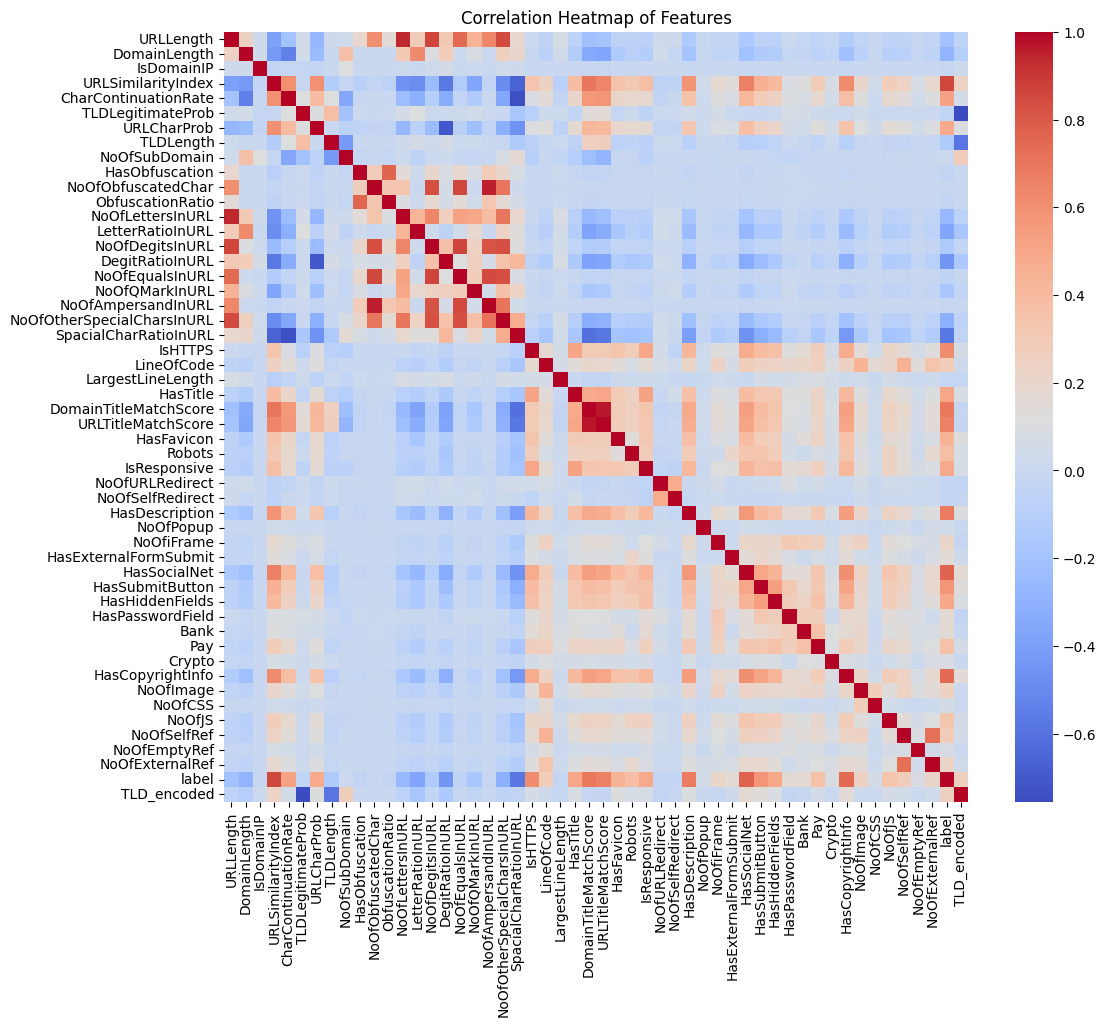

In [210]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

In [212]:
# Calculate absolute correlations with the 'label' column
correlation_matrix = df.corr(numeric_only=True)
abs_correlations = correlation_matrix['label'].abs().sort_values(ascending=False)

# Select a reduced set of top features (e.g., top 20 instead of 25, excluding 'label')
top_n_features_to_drop = 10 # Change from 5 to 10 to drop the next 5 most correlated
initial_top_features = abs_correlations[1:].index.tolist() # Exclude 'label' itself

# Drop the N most correlated features to try and mitigate overfitting
features_to_remove = initial_top_features[:top_n_features_to_drop]
remaining_features = [f for f in initial_top_features if f not in features_to_remove]

# Include 'label' in the list of columns to keep
columns_to_keep = remaining_features + ['label']

# Ensure 'TLD_encoded' is in and 'TLD' is not, as TLD is handled elsewhere in X drop
# If 'TLD' was accidentally included in remaining_features (which it shouldn't be here)
# ensure only TLD_encoded is present. Let's make sure TLD_encoded is in if it's high enough.
if 'TLD_encoded' not in columns_to_keep and 'TLD_encoded' in abs_correlations.index and len(columns_to_keep) < 20: # Example logic
    columns_to_keep.append('TLD_encoded')

# Remove 'TLD' from columns_to_keep if it made it in (it should be handled in X drop)
if 'TLD' in columns_to_keep:
    columns_to_keep.remove('TLD')

print("Columns to keep after dropping highly correlated features:", columns_to_keep)


Columns to keep after dropping highly correlated features: ['HasTitle', 'HasHiddenFields', 'IsResponsive', 'URLCharProb', 'HasFavicon', 'DegitRatioInURL', 'Robots', 'LetterRatioInURL', 'Pay', 'NoOfJS', 'NoOfOtherSpecialCharsInURL', 'DomainLength', 'LineOfCode', 'NoOfSelfRef', 'NoOfLettersInURL', 'TLD_encoded', 'NoOfImage', 'NoOfExternalRef', 'NoOfiFrame', 'URLLength', 'NoOfQMarkInURL', 'HasPasswordField', 'Bank', 'HasExternalFormSubmit', 'NoOfDegitsInURL', 'TLDLength', 'Crypto', 'NoOfEmptyRef', 'NoOfEqualsInURL', 'NoOfCSS', 'TLDLegitimateProb', 'NoOfPopup', 'HasObfuscation', 'NoOfSelfRedirect', 'ObfuscationRatio', 'NoOfURLRedirect', 'LargestLineLength', 'NoOfAmpersandInURL', 'IsDomainIP', 'NoOfObfuscatedChar', 'NoOfSubDomain', 'label']


In [213]:
# Drop the other columns from the DataFrame
df = df[columns_to_keep]

print("DataFrame updated with the selected features most correlated with 'label'.")
display(df.head())

DataFrame updated with the selected features most correlated with 'label'.


,HasTitle,HasHiddenFields,IsResponsive,URLCharProb,HasFavicon,DegitRatioInURL,Robots,LetterRatioInURL,Pay,NoOfJS,...,HasObfuscation,NoOfSelfRedirect,ObfuscationRatio,NoOfURLRedirect,LargestLineLength,NoOfAmpersandInURL,IsDomainIP,NoOfObfuscatedChar,NoOfSubDomain,label
0,1,1,1,0.061933,0,0.0,1,0.581,0,28,...,0,0,0.0,0,9381,0,0,0,1,1
2,1,1,1,0.064129,0,0.0,1,0.517,0,7,...,0,0,0.0,0,682,0,0,0,2,1
3,1,1,1,0.057606,0,0.0,1,0.500,1,15,...,0,0,0.0,0,26824,0,0,0,1,1
4,1,1,1,0.059441,0,0.0,1,0.606,1,34,...,0,1,0.0,1,28404,0,0,0,1,1
5,1,1,1,0.060614,0,0.0,0,0.567,0,11,...,0,0,0.0,0,737,0,0,0,1,1


In [214]:
print(df['label'].value_counts())

label
1    95520
0    55827
Name: count, dtype: int64


In [215]:
df.describe()

,HasTitle,HasHiddenFields,IsResponsive,URLCharProb,HasFavicon,DegitRatioInURL,Robots,LetterRatioInURL,Pay,NoOfJS,...,HasObfuscation,NoOfSelfRedirect,ObfuscationRatio,NoOfURLRedirect,LargestLineLength,NoOfAmpersandInURL,IsDomainIP,NoOfObfuscatedChar,NoOfSubDomain,label
count,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,...,151347.000000,151347.000000,151347.000000,151347.000000,1.513470e+05,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000
mean,0.869393,0.409939,0.677001,0.058109,0.382512,0.021917,0.288100,0.525108,0.276847,11.648490,...,0.001196,0.032435,0.000086,0.129405,8.662856e+03,0.013023,0.000198,0.022220,1.066668,0.631132
std,0.336971,0.491824,0.467624,0.009068,0.486002,0.058739,0.452879,0.109038,0.447442,23.640814,...,0.034562,0.177154,0.003286,0.335648,4.434148e+04,0.806973,0.014078,2.295482,0.478506,0.482500
min,0.000000,0.000000,0.000000,0.006335,0.000000,0.000000,0.000000,0.056000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.054141,0.000000,0.000000,0.000000,0.458000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.910000e+02,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,0.059698,0.000000,0.000000,0.000000,0.520000,0.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,1.782000e+03,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.064060,1.000000,0.000000,1.000000,0.594000,1.000000,17.000000,...,0.000000,0.000000,0.000000,0.000000,8.198000e+03,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.090824,1.000000,0.684000,1.000000,0.926000,1.000000,6957.000000,...,1.000000,1.000000,0.348000,1.000000,4.336498e+06,149.000000,1.000000,447.000000,10.000000,1.000000


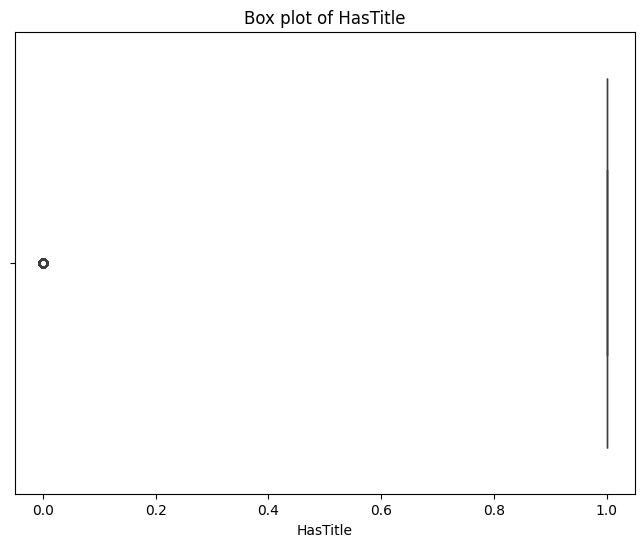

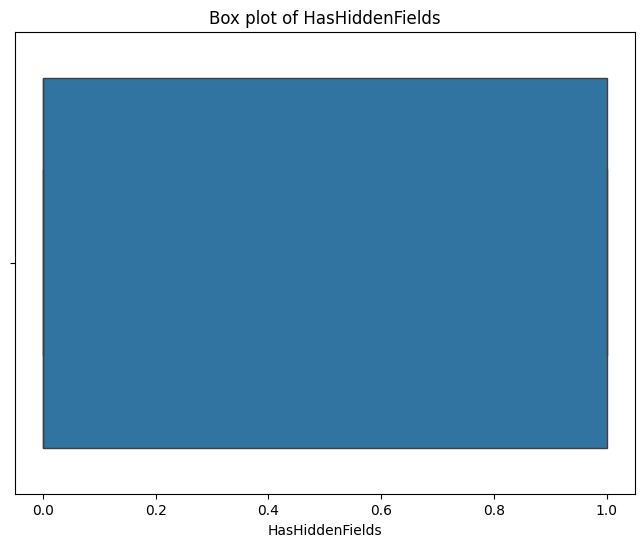

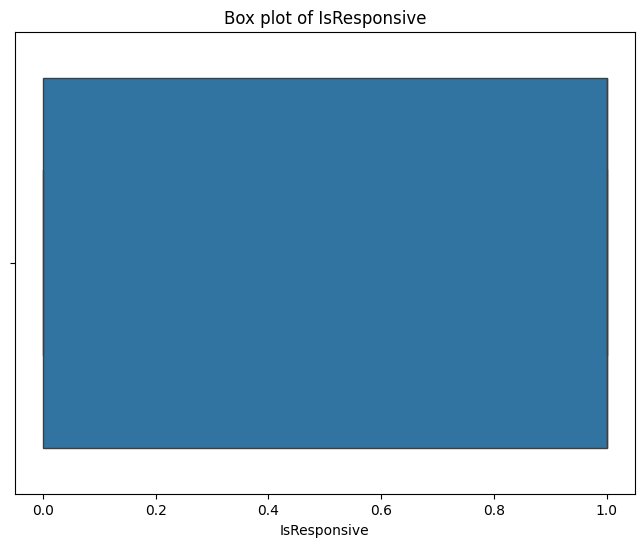

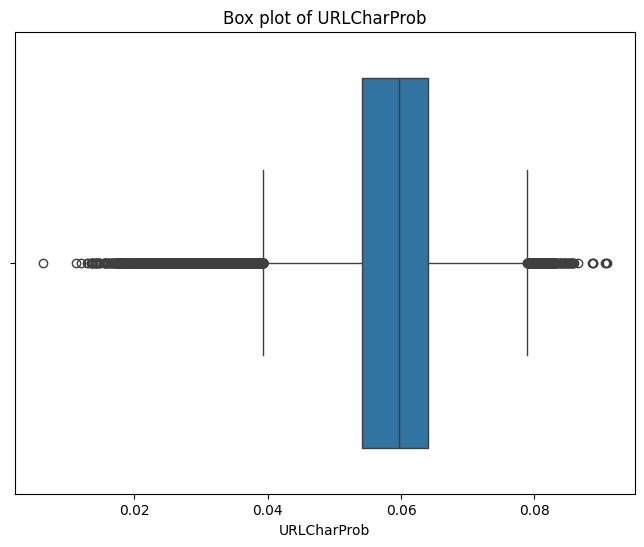

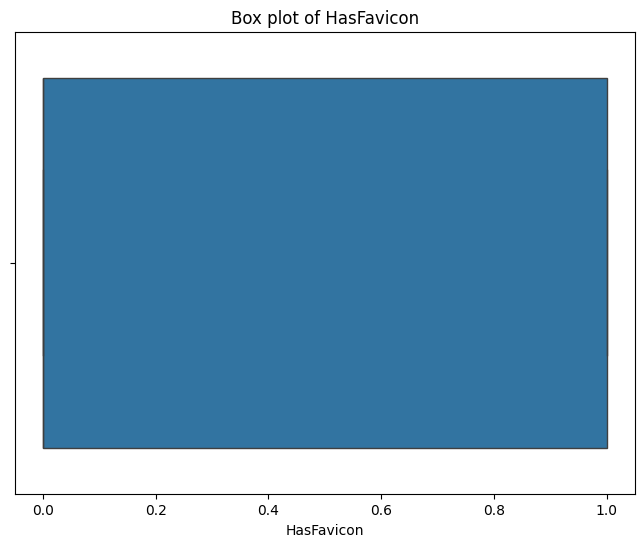

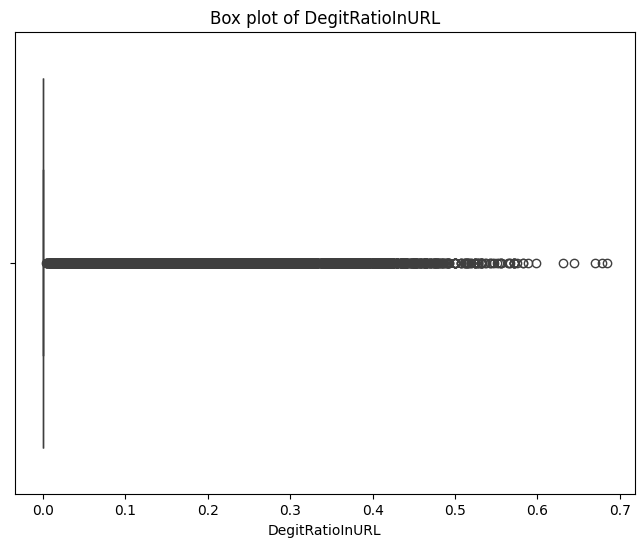

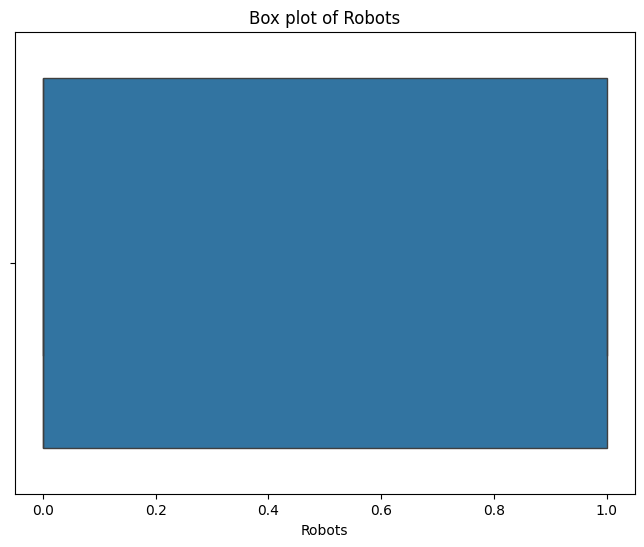

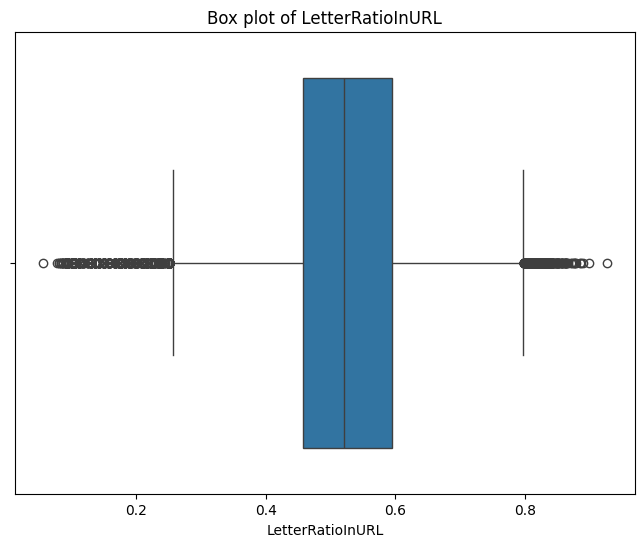

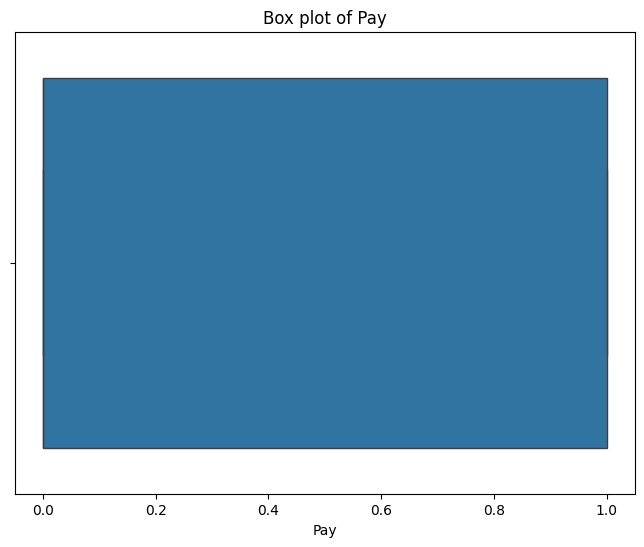

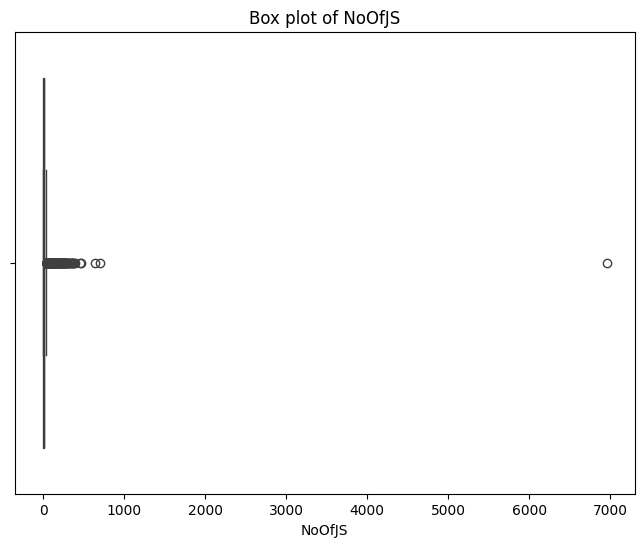

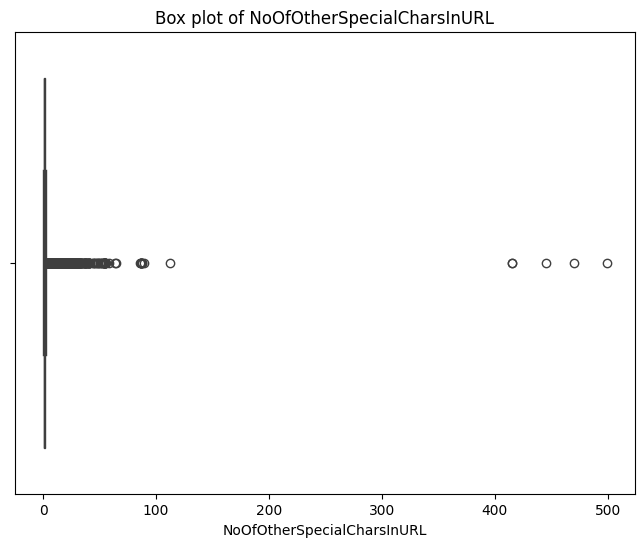

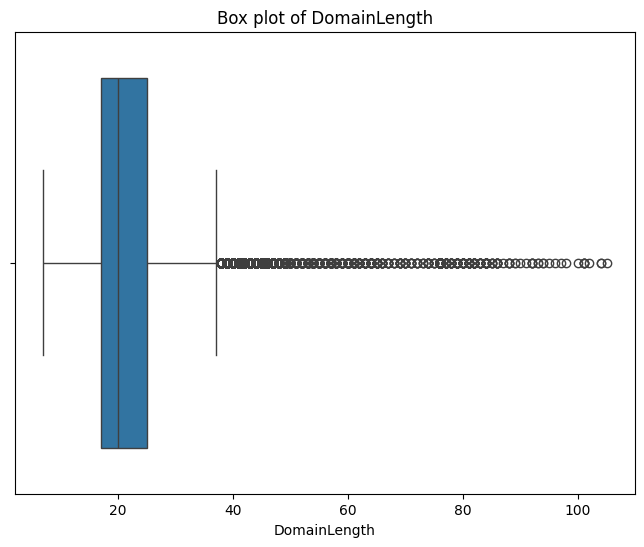

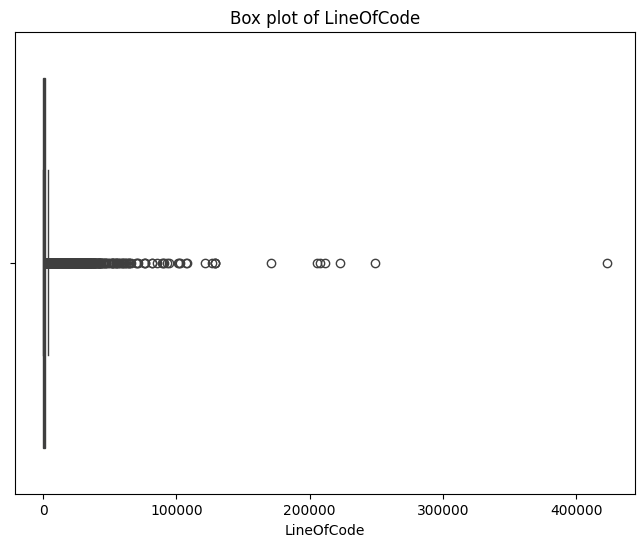

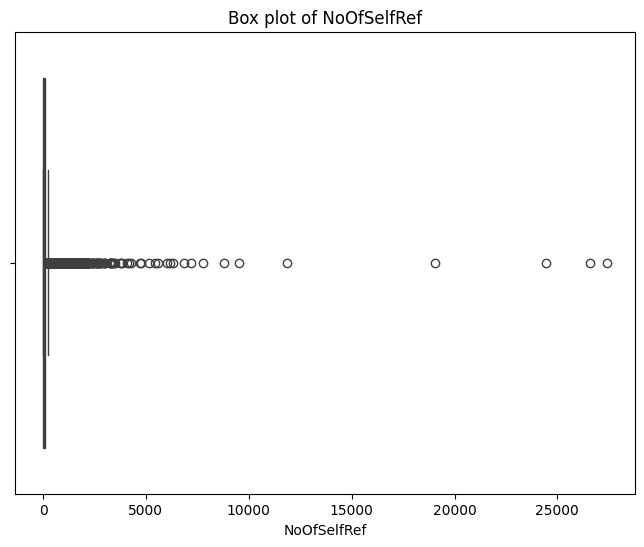

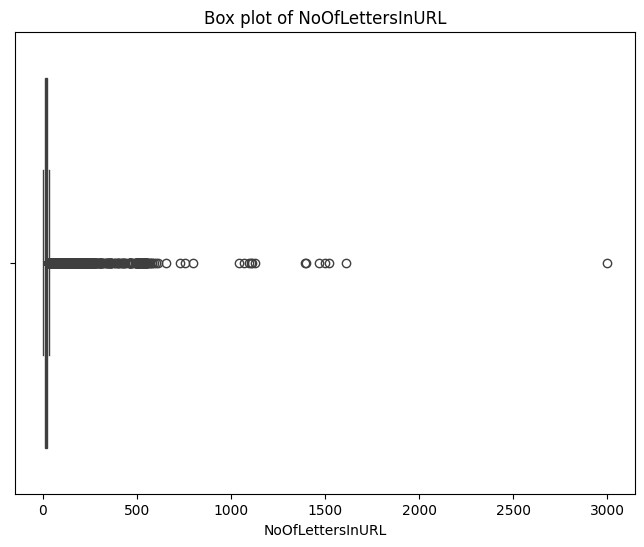

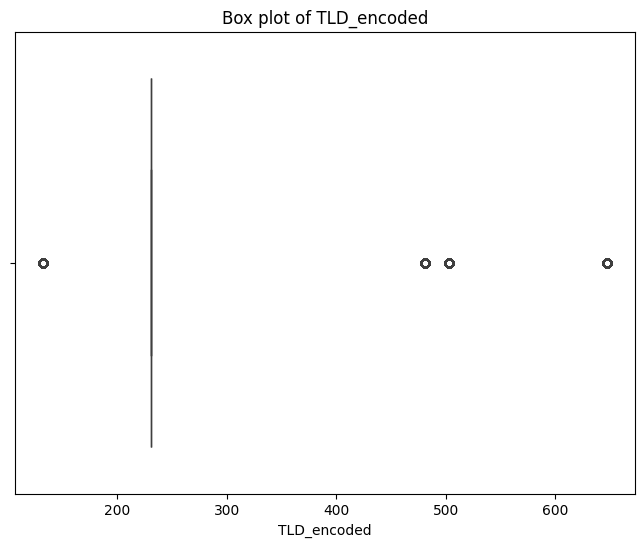

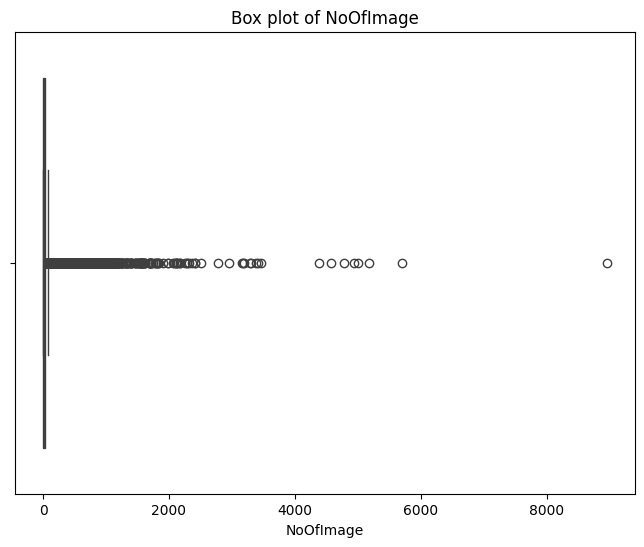

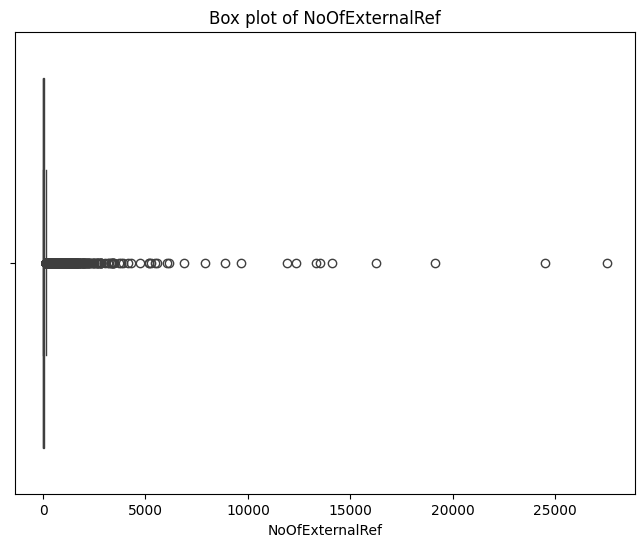

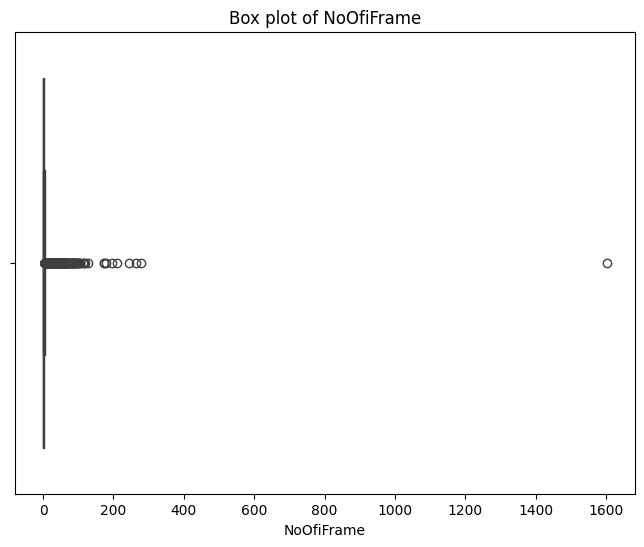

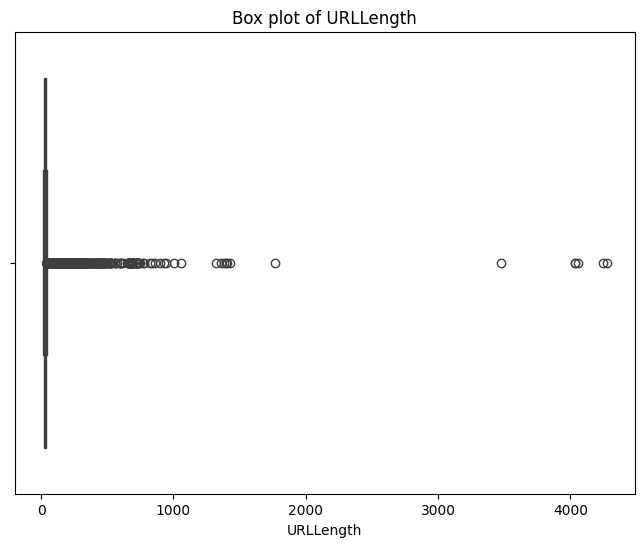

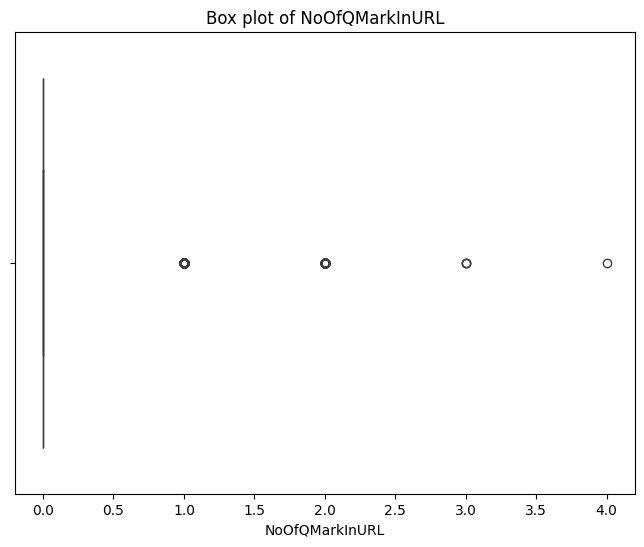

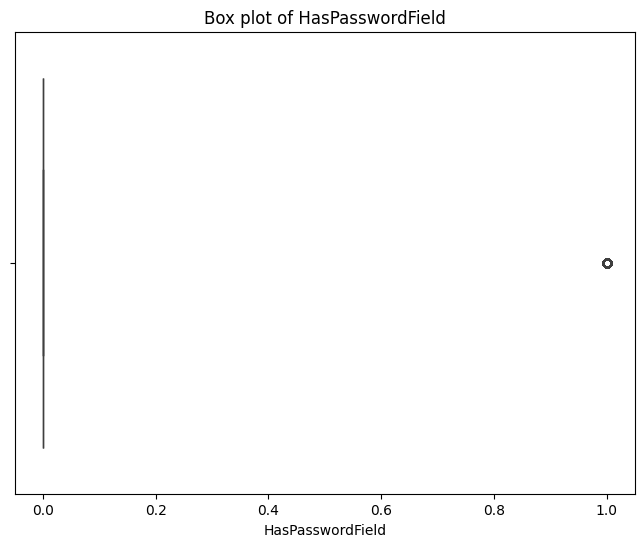

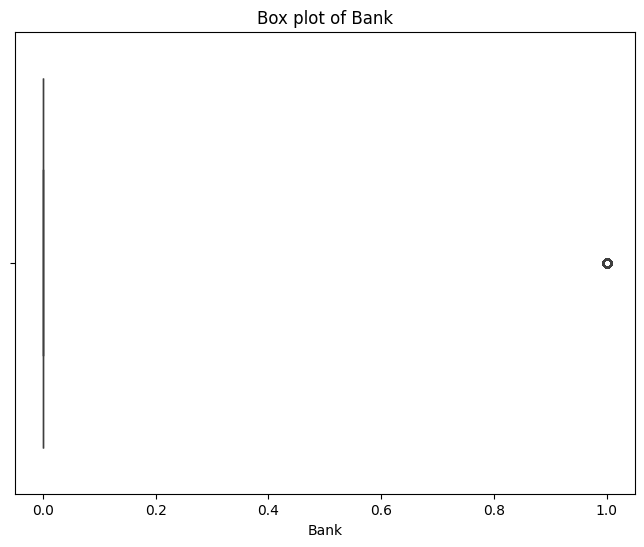

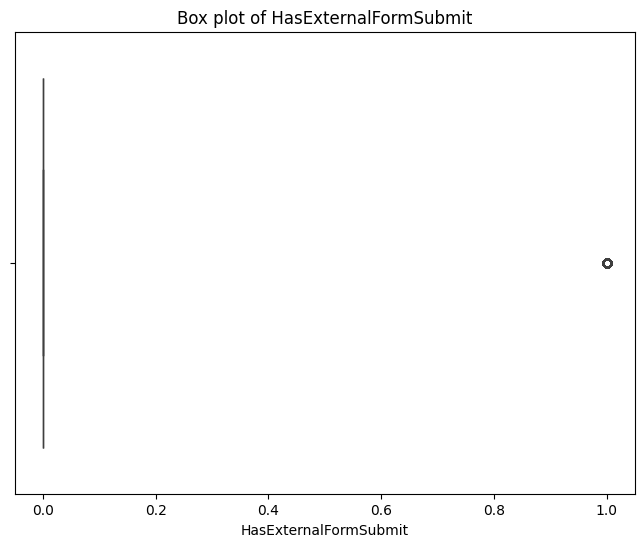

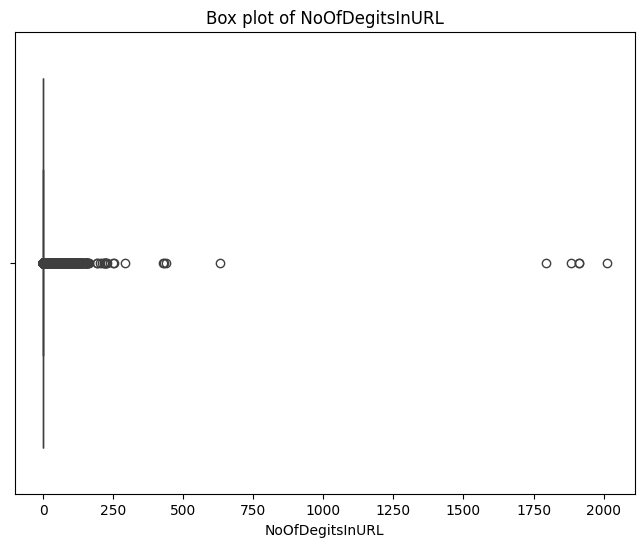

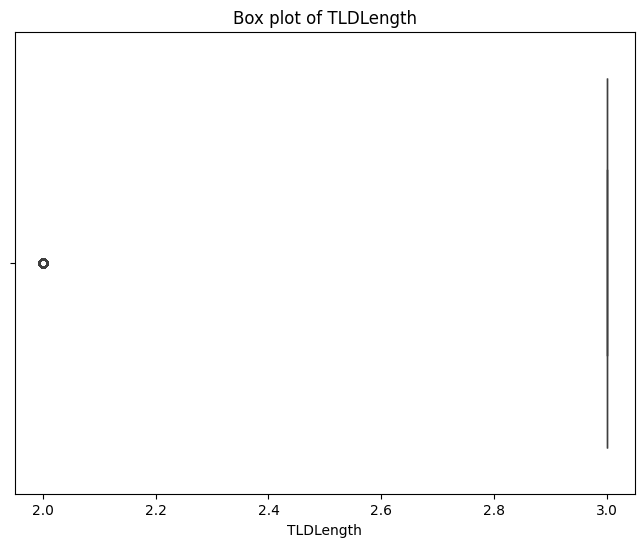

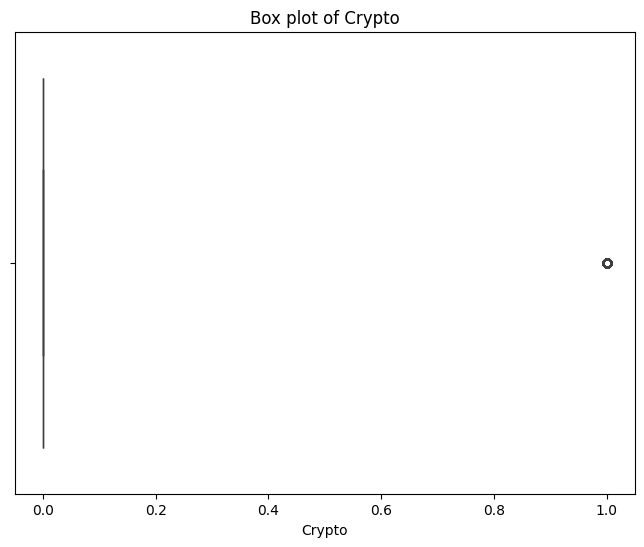

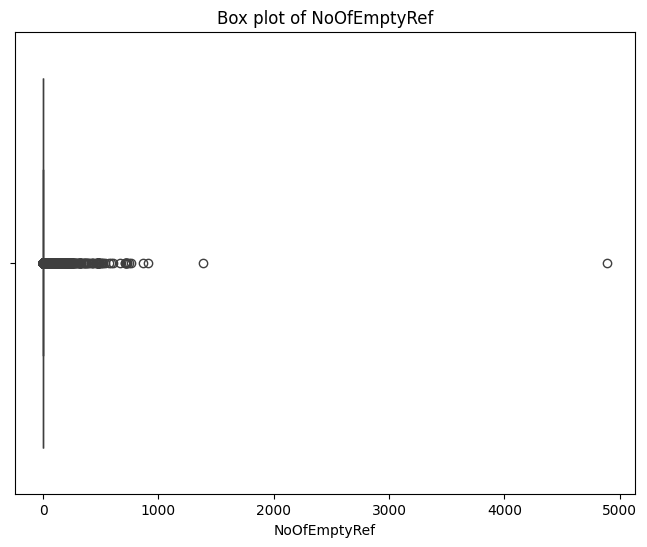

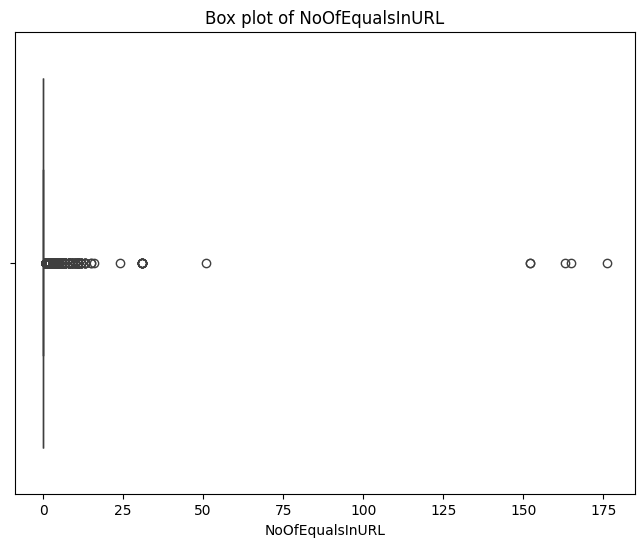

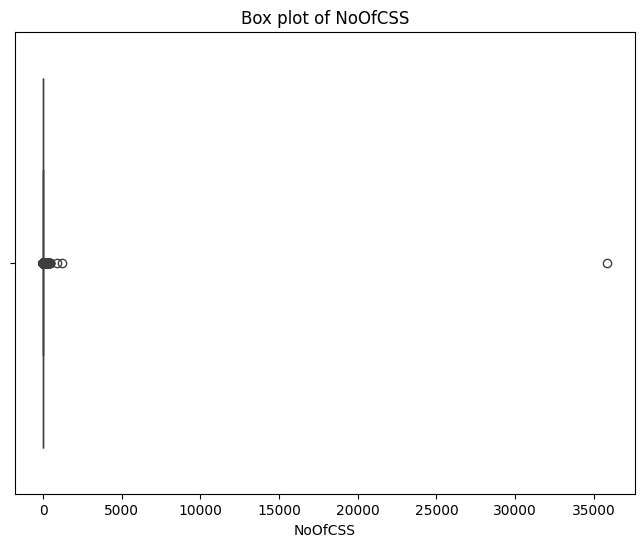

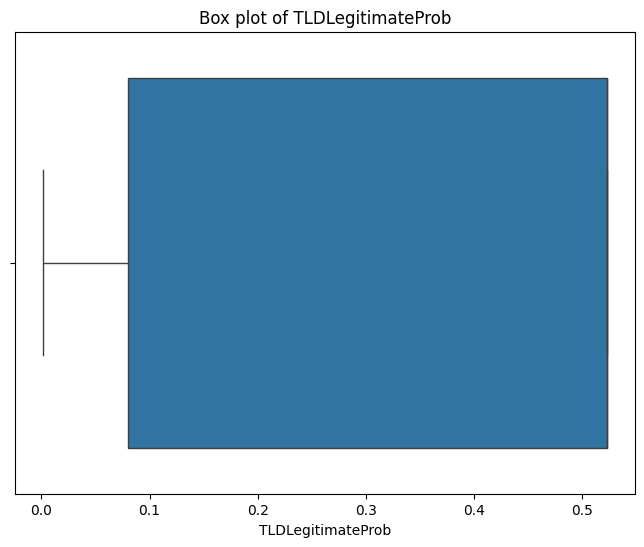

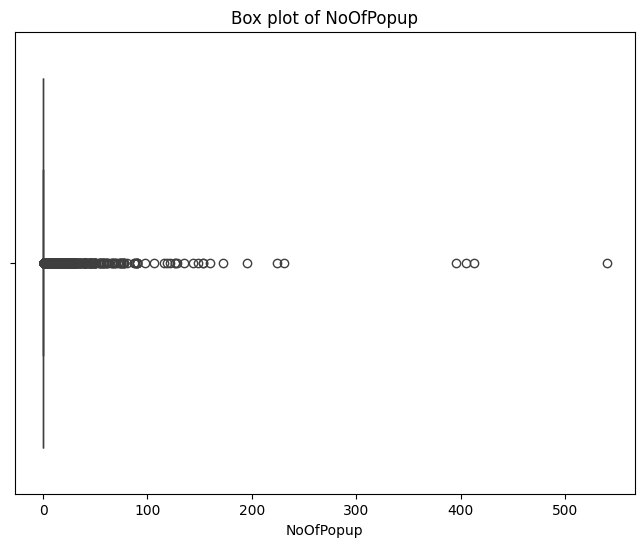

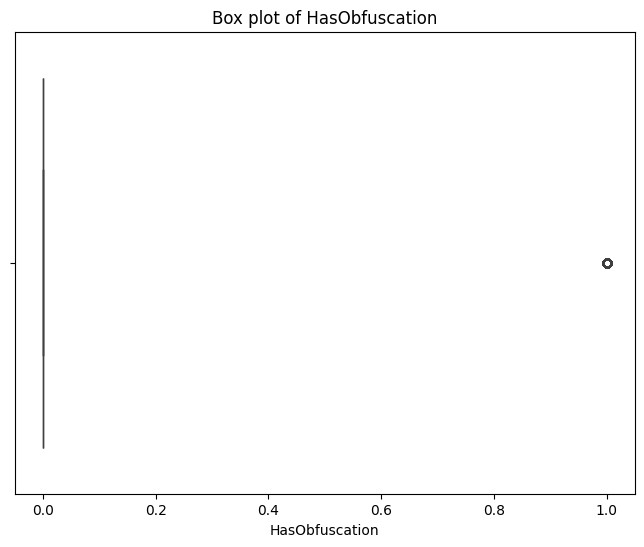

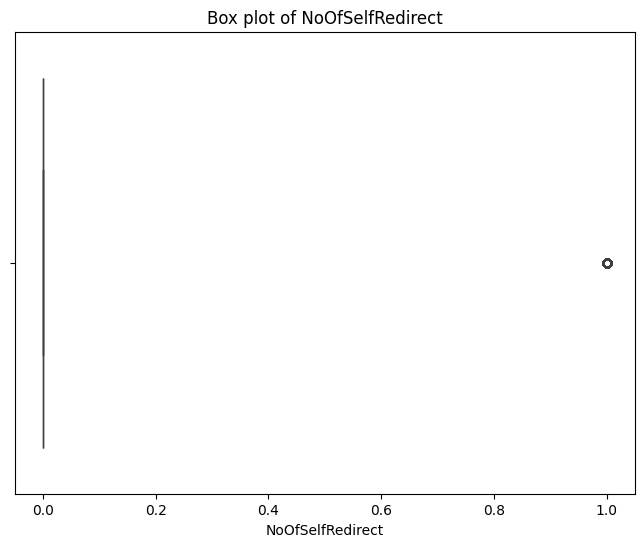

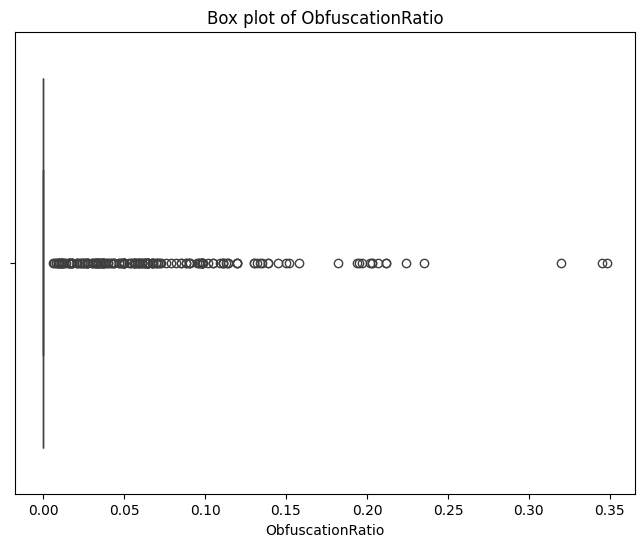

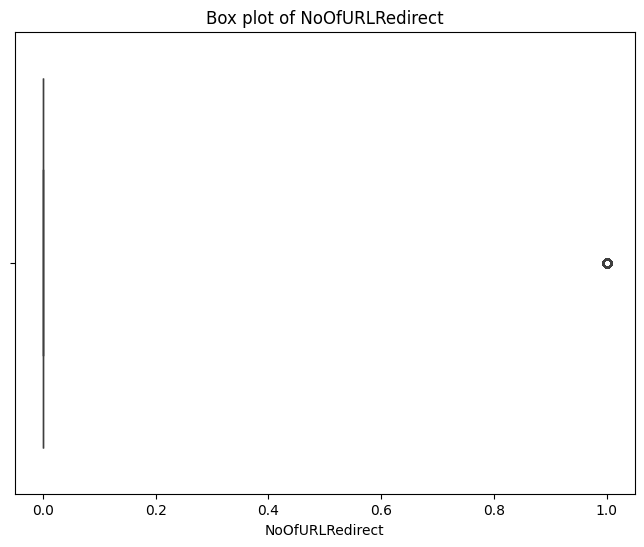

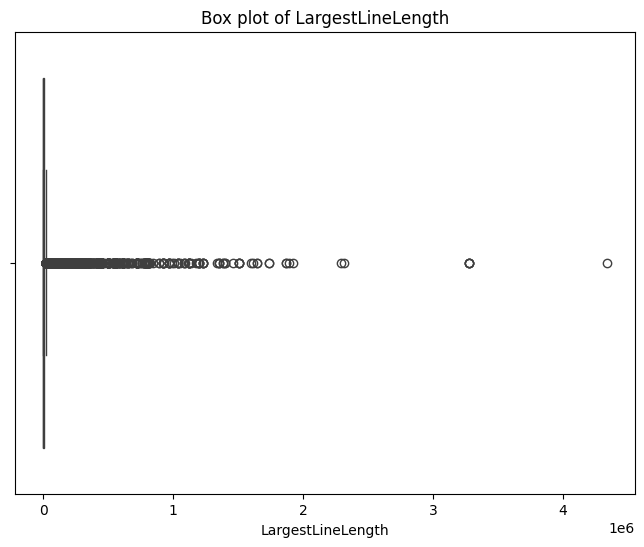

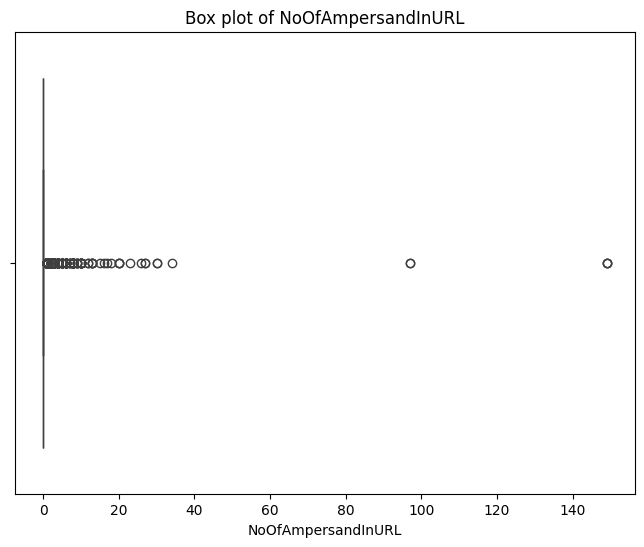

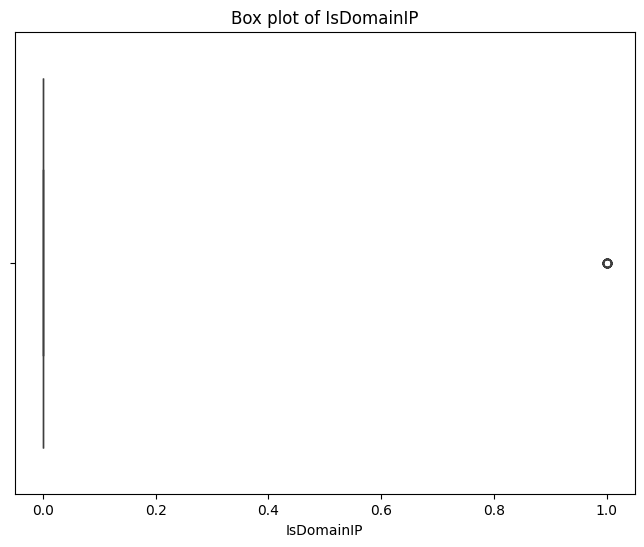

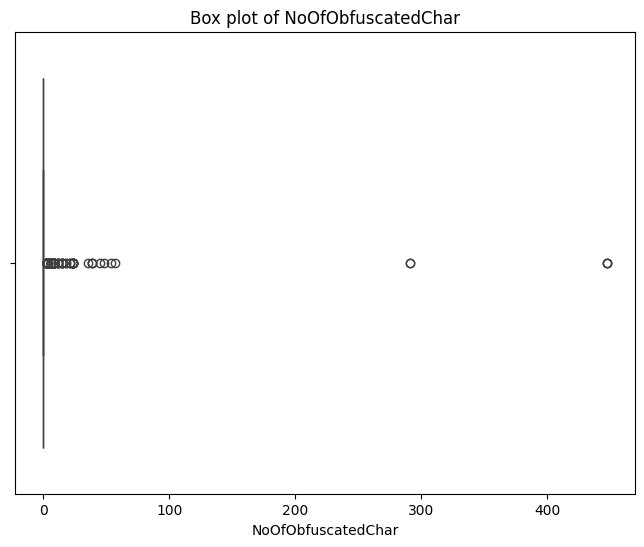

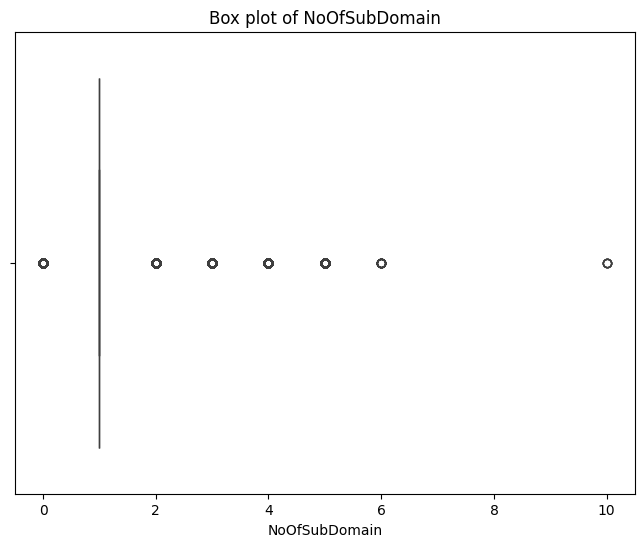

In [216]:
for column in df.columns:
    if column != 'label':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Box plot of {column}')
        plt.show()

In [217]:
print(df['label'].value_counts())

label
1    95520
0    55827
Name: count, dtype: int64


In [218]:
# Identify columns for outlier removal based on previous box plots (excluding 'label')
columns_to_clean = [column for column in df.columns if column != 'label']

# Remove only extreme outliers using wider IQR bounds
for column in columns_to_clean:
    Q1 = df[column].quantile(0.05)
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3.0 * IQR
    upper_bound = Q3 + 3.0 * IQR
    before = len(df)
    # Filter out the outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    after = len(df)
    print(f"Column {column}: removed {before - after} outliers")

print(f"Outliers removed. Dataset size: {len(df)}")

print("Outliers removed from the DataFrame based on IQR for the selected columns.")
display(df.head())

Column HasTitle: removed 0 outliers
Column HasHiddenFields: removed 0 outliers
Column IsResponsive: removed 0 outliers
Column URLCharProb: removed 0 outliers
Column HasFavicon: removed 0 outliers
Column DegitRatioInURL: removed 5 outliers
Column Robots: removed 0 outliers
Column LetterRatioInURL: removed 0 outliers
Column Pay: removed 0 outliers
Column NoOfJS: removed 53 outliers
Column NoOfOtherSpecialCharsInURL: removed 274 outliers
Column DomainLength: removed 6 outliers
Column LineOfCode: removed 379 outliers
Column NoOfSelfRef: removed 252 outliers
Column NoOfLettersInURL: removed 439 outliers
Column TLD_encoded: removed 0 outliers
Column NoOfImage: removed 580 outliers
Column NoOfExternalRef: removed 100 outliers
Column NoOfiFrame: removed 105 outliers
Column URLLength: removed 457 outliers
Column NoOfQMarkInURL: removed 1854 outliers
Column HasPasswordField: removed 0 outliers
Column Bank: removed 0 outliers
Column HasExternalFormSubmit: removed 7251 outliers
Column NoOfDegitsIn

,HasTitle,HasHiddenFields,IsResponsive,URLCharProb,HasFavicon,DegitRatioInURL,Robots,LetterRatioInURL,Pay,NoOfJS,...,HasObfuscation,NoOfSelfRedirect,ObfuscationRatio,NoOfURLRedirect,LargestLineLength,NoOfAmpersandInURL,IsDomainIP,NoOfObfuscatedChar,NoOfSubDomain,label
0,1,1,1,0.061933,0,0.0,1,0.581,0,28,...,0,0,0.0,0,9381,0,0,0,1,1
5,1,1,1,0.060614,0,0.0,0,0.567,0,11,...,0,0,0.0,0,737,0,0,0,1,1
7,1,0,1,0.060486,1,0.0,0,0.480,0,22,...,0,0,0.0,0,399,0,0,0,1,1
9,1,0,1,0.070497,1,0.0,1,0.278,0,12,...,0,0,0.0,0,481,0,0,0,1,1
10,1,0,1,0.063946,1,0.0,1,0.606,1,10,...,0,0,0.0,0,584,0,0,0,1,1


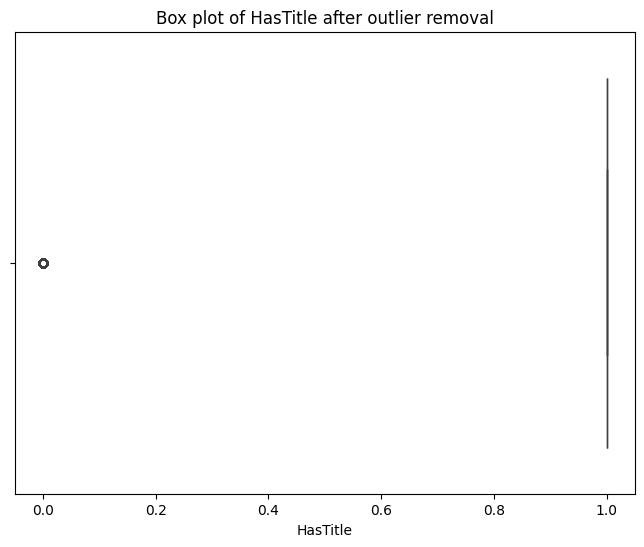

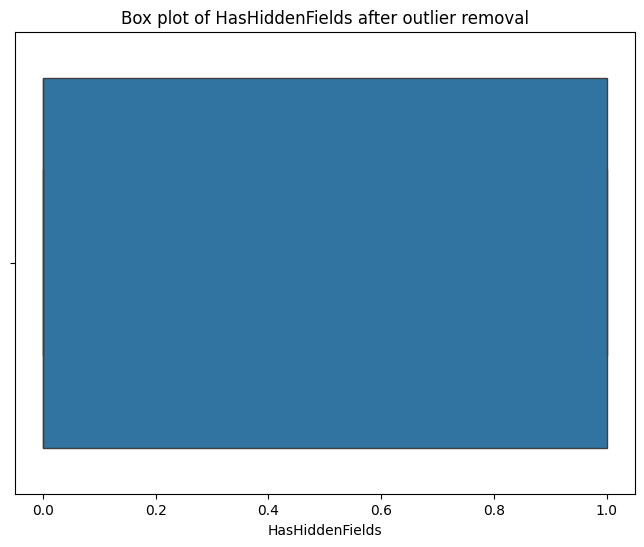

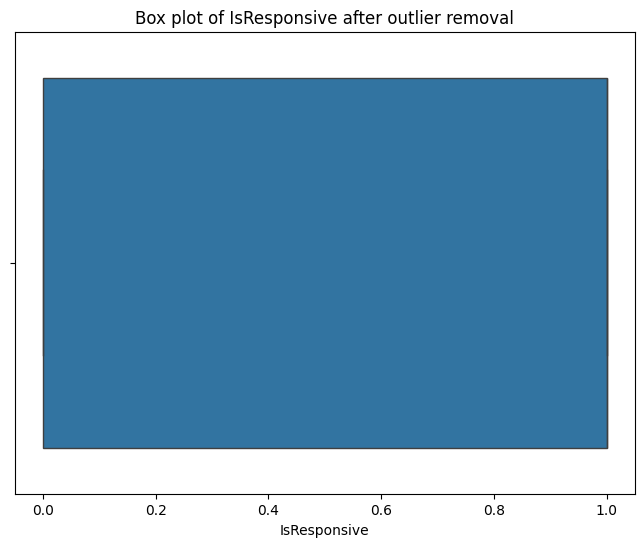

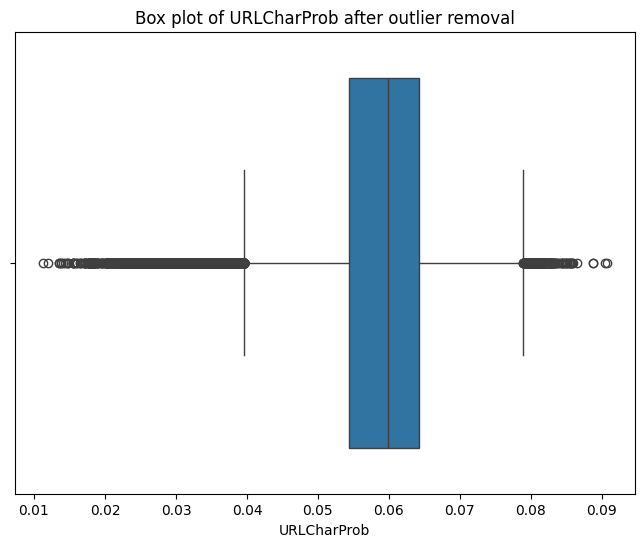

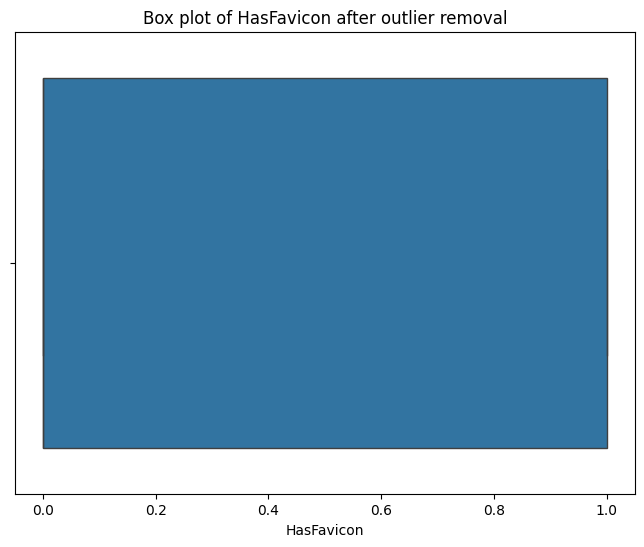

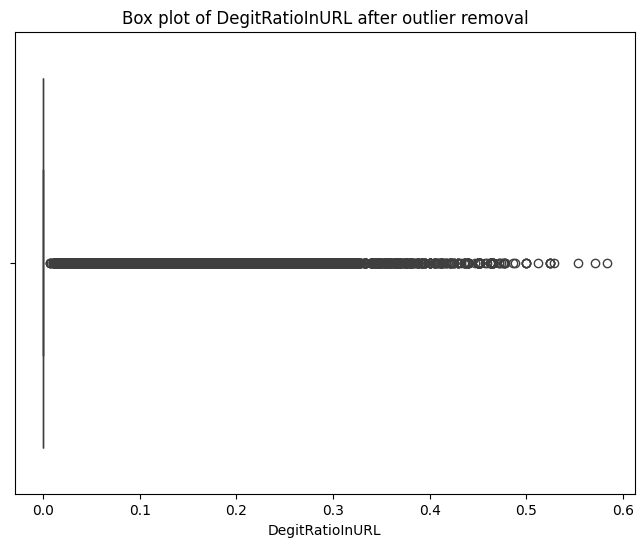

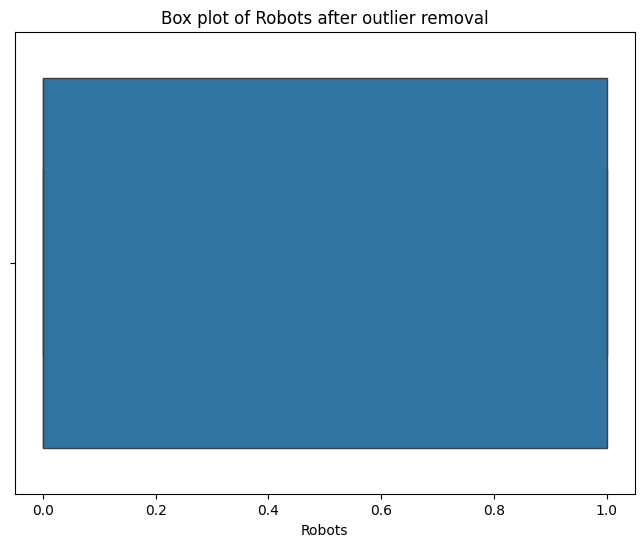

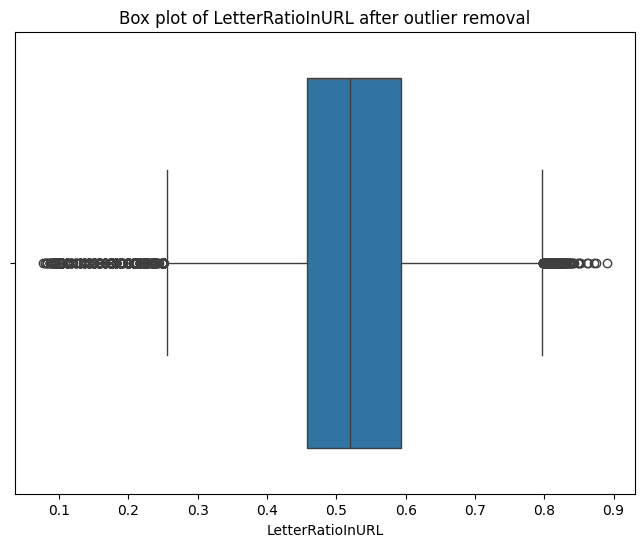

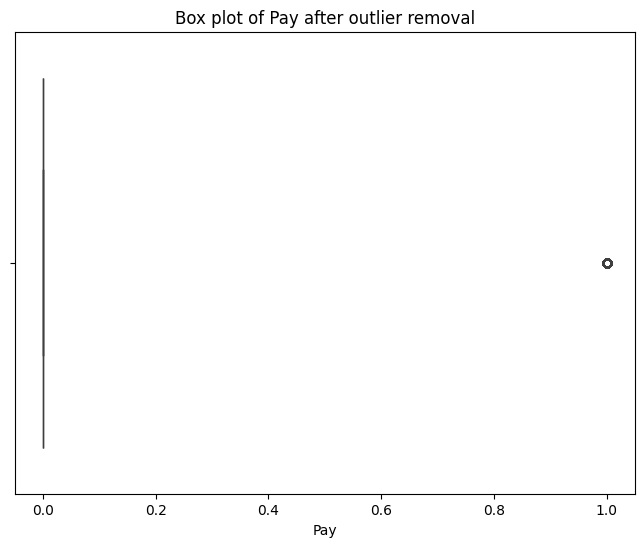

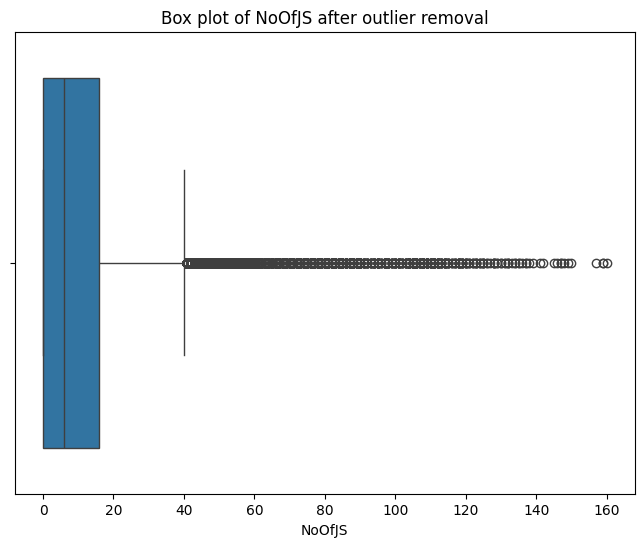

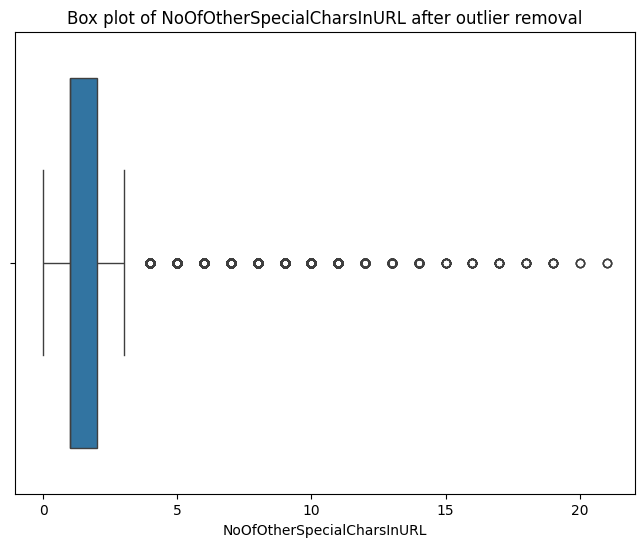

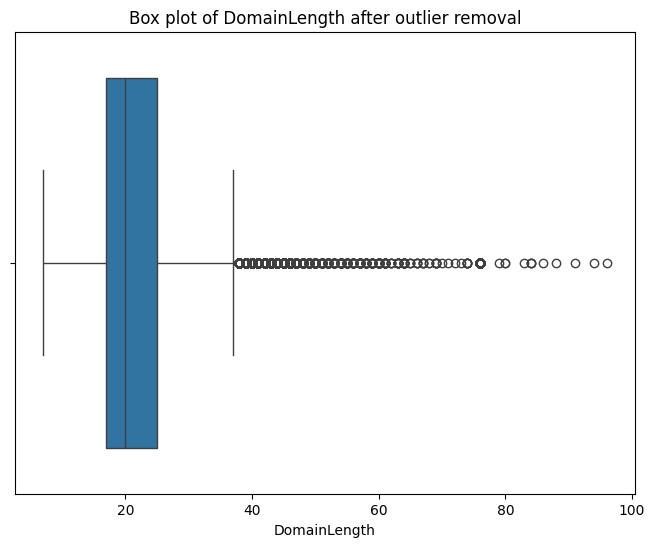

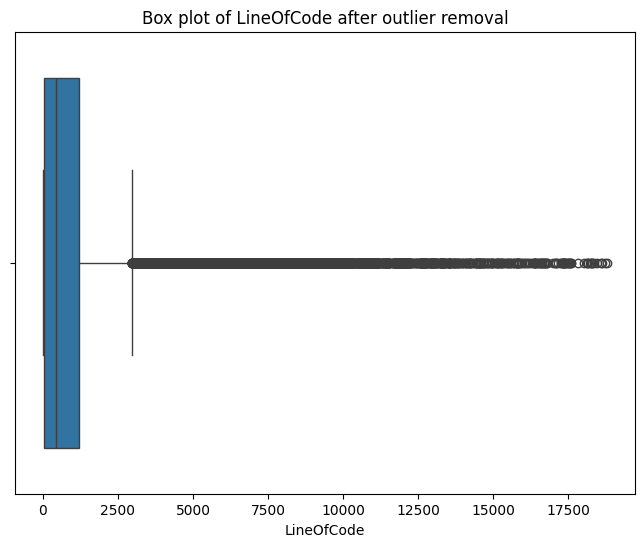

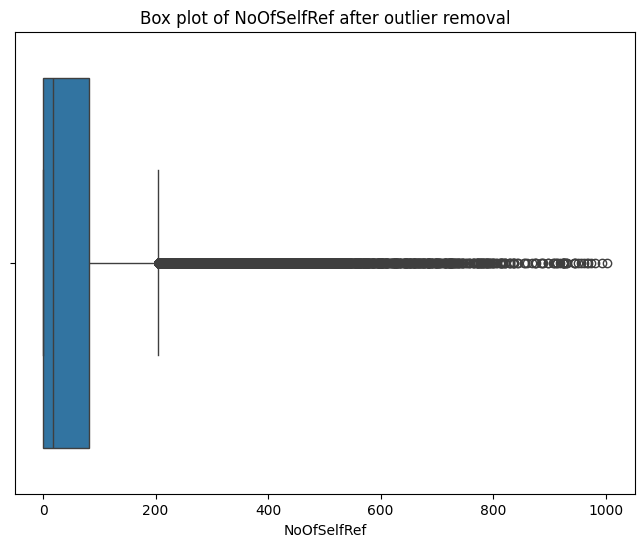

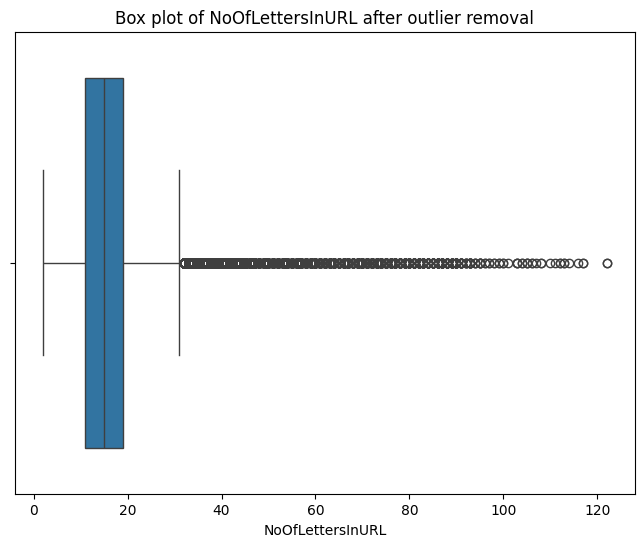

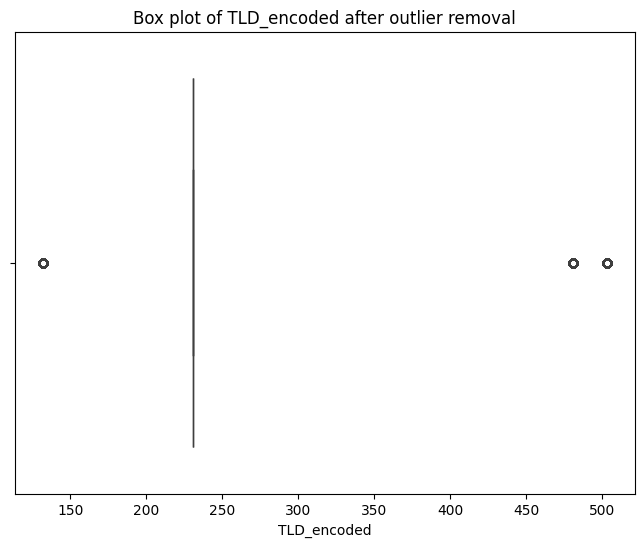

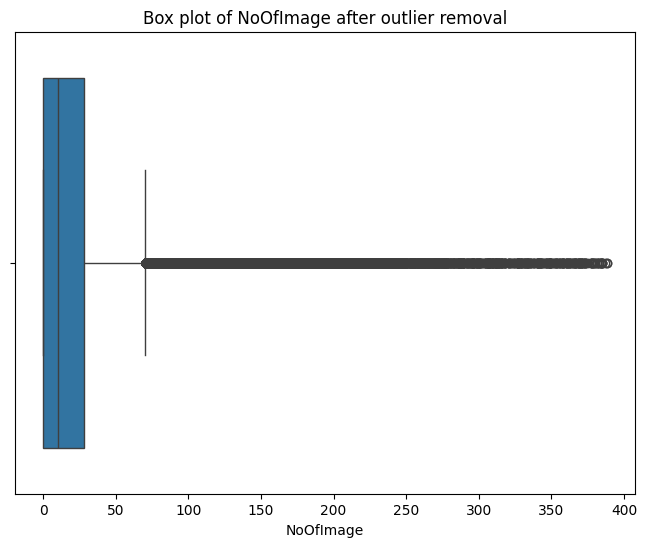

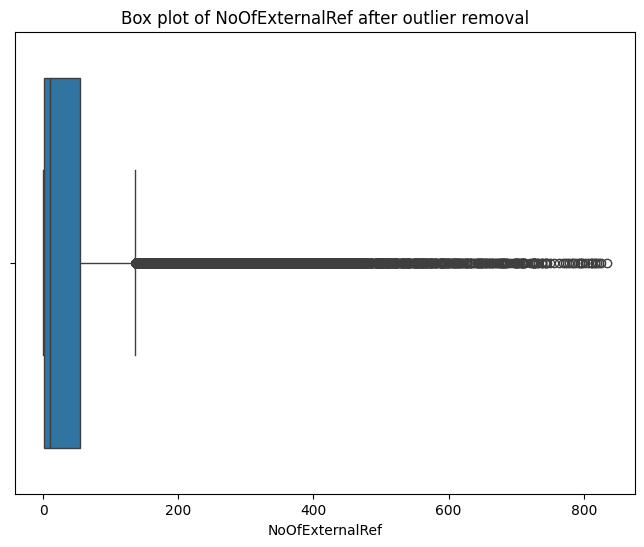

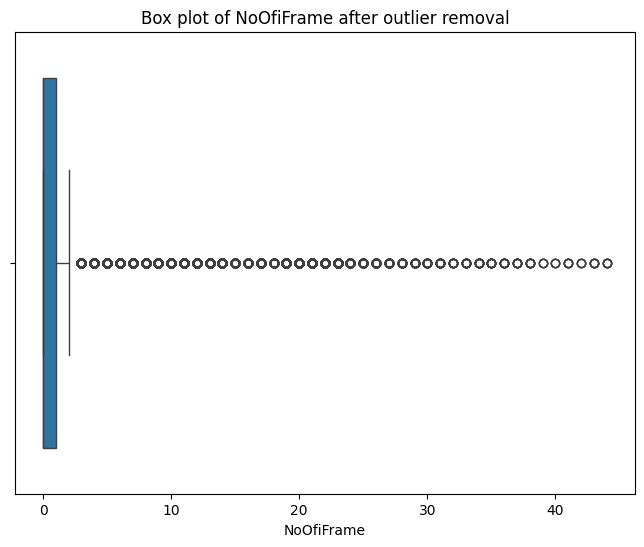

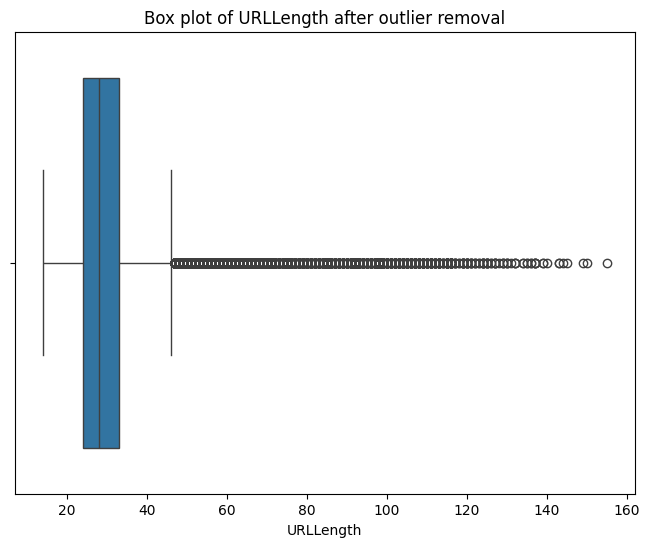

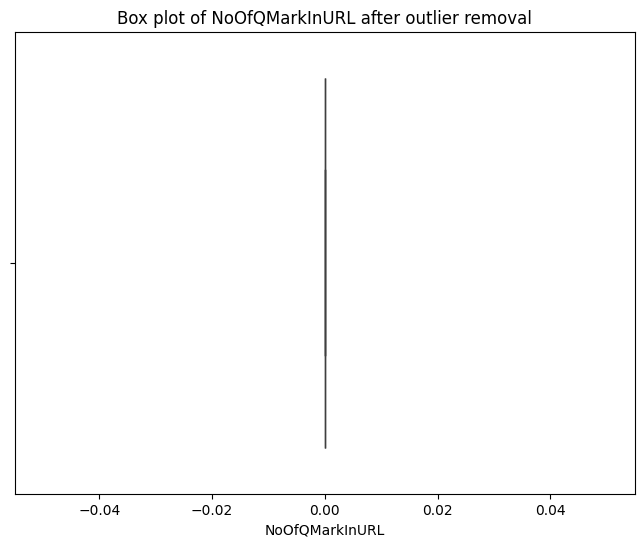

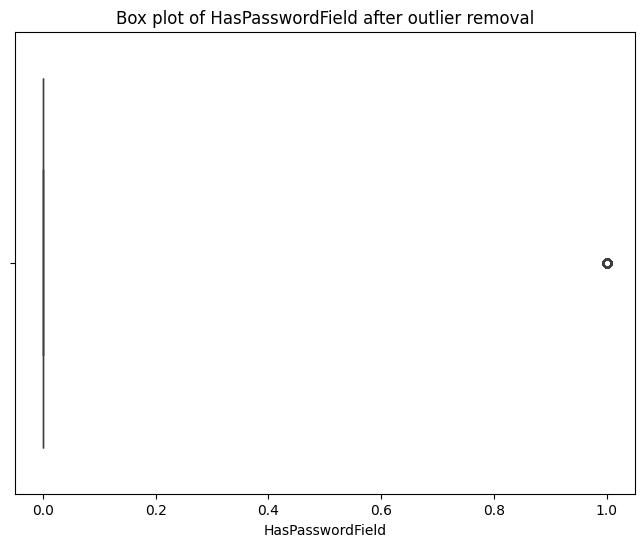

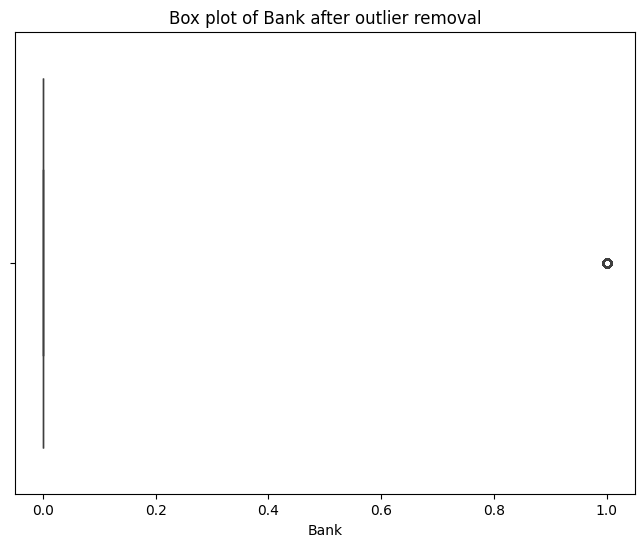

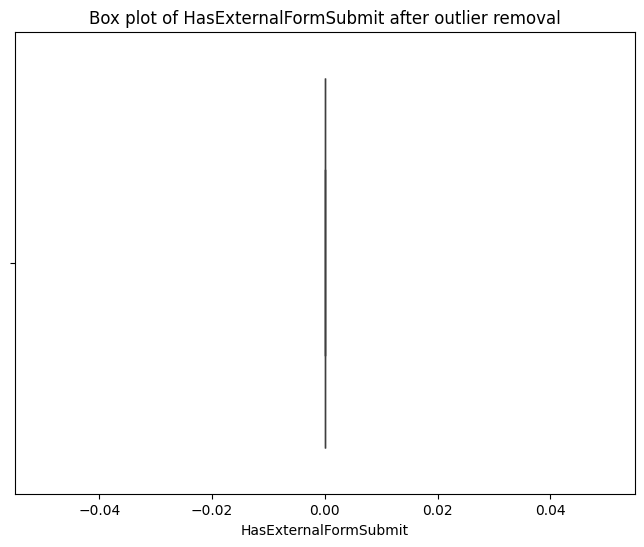

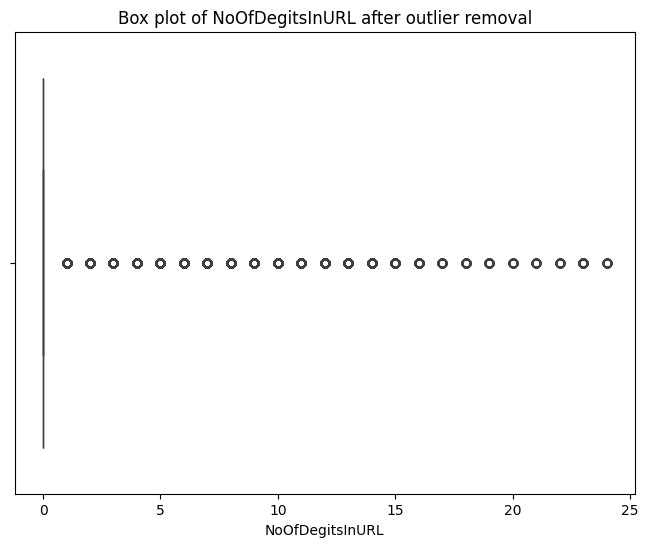

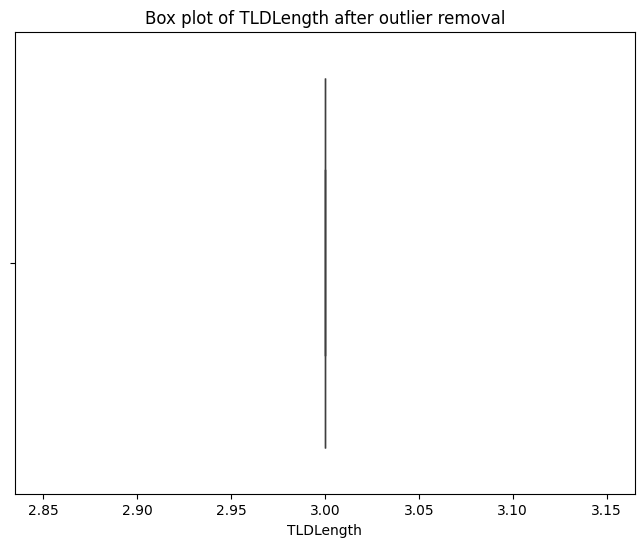

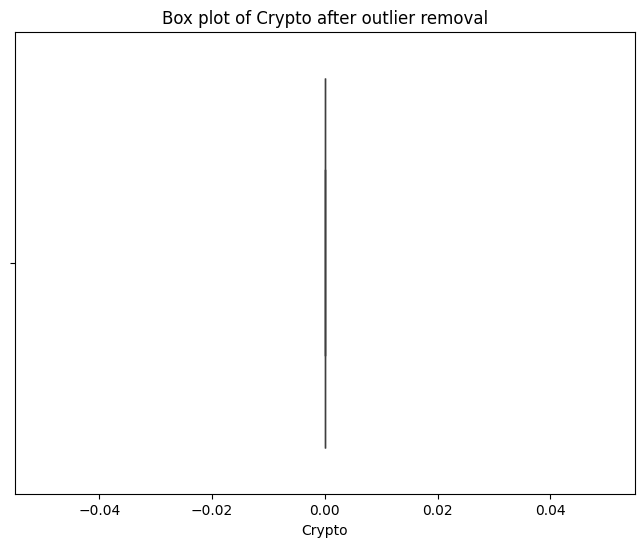

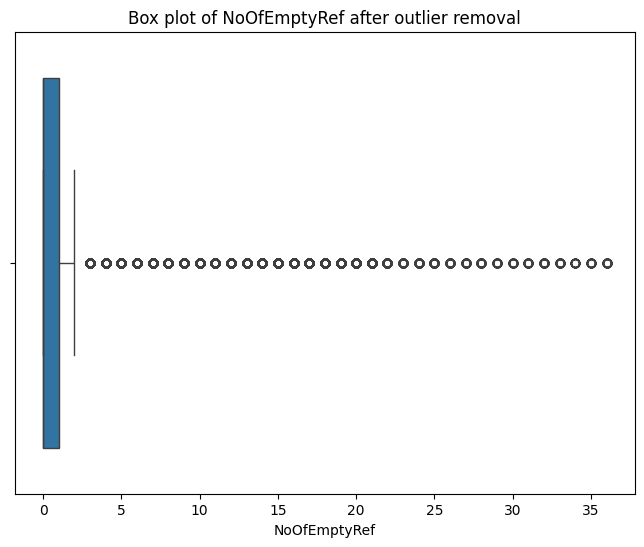

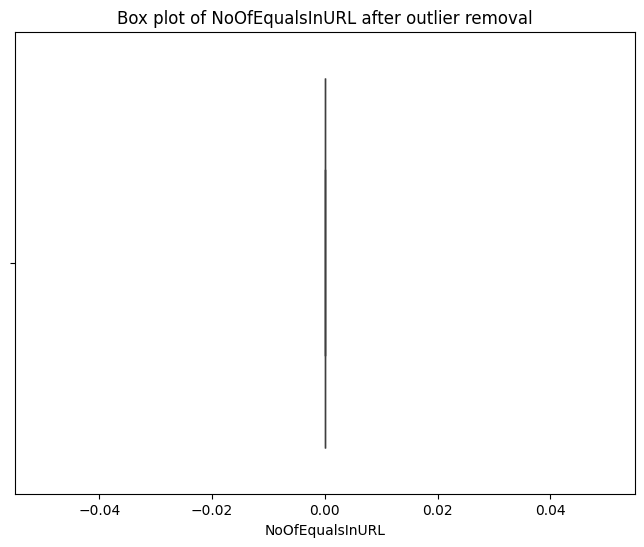

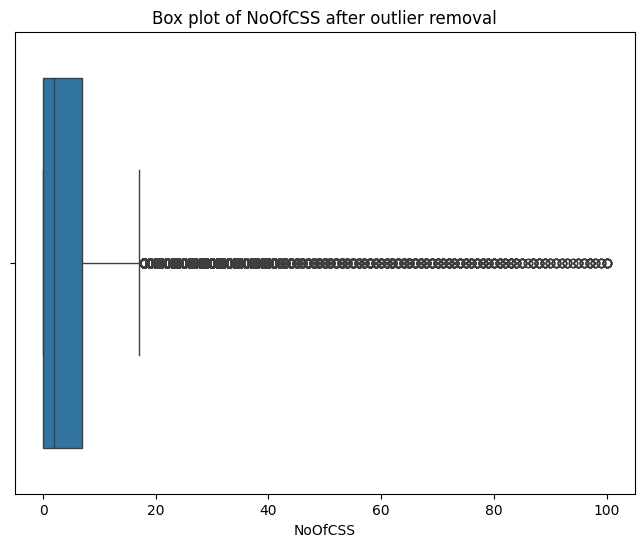

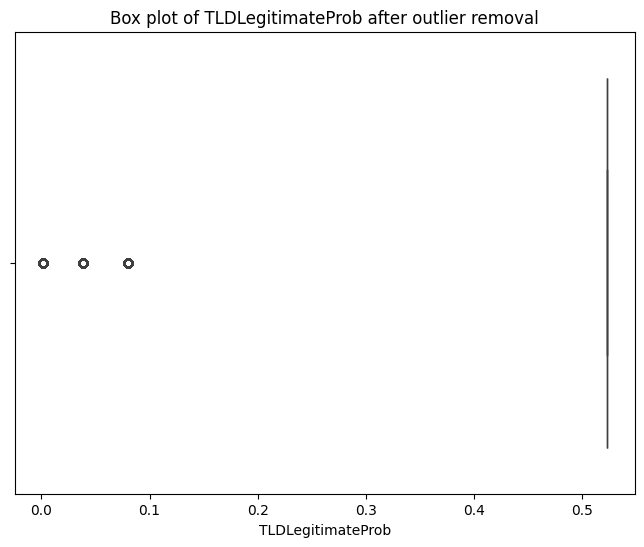

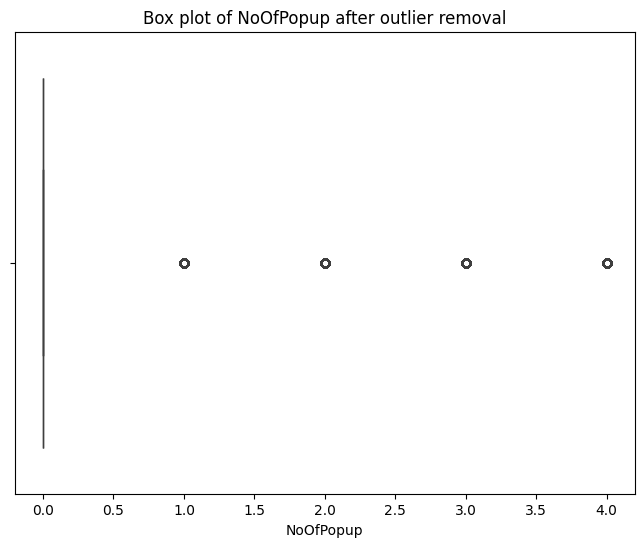

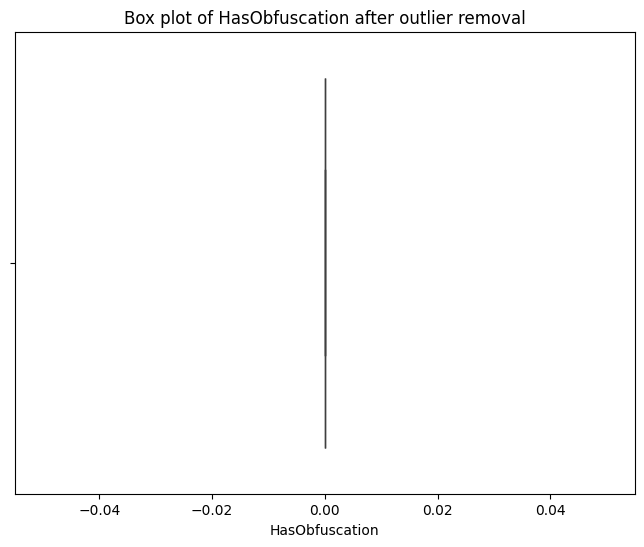

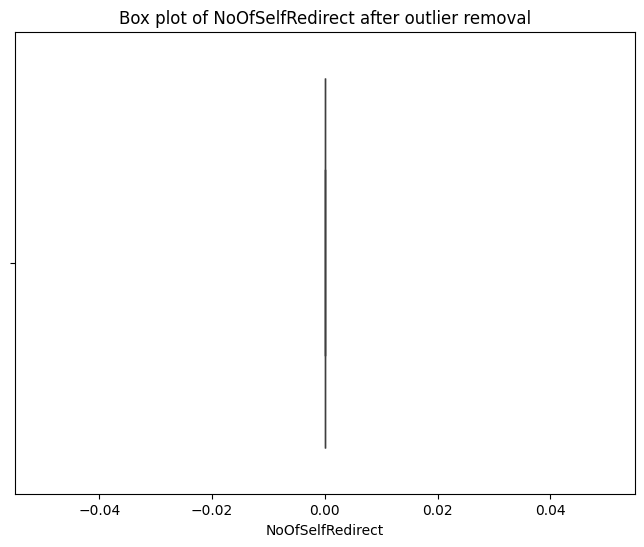

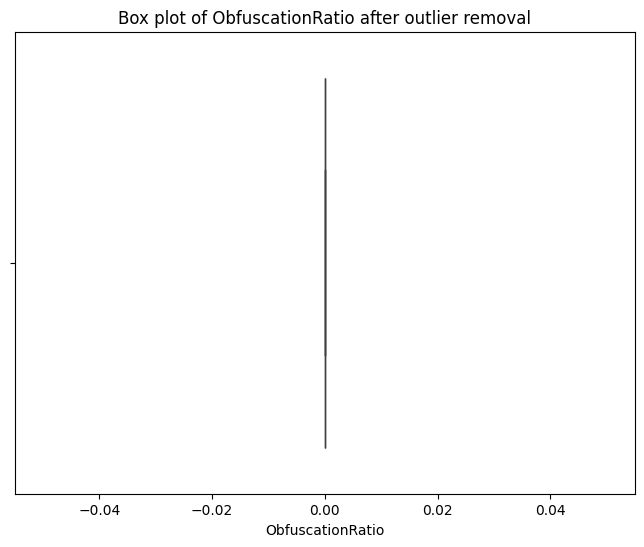

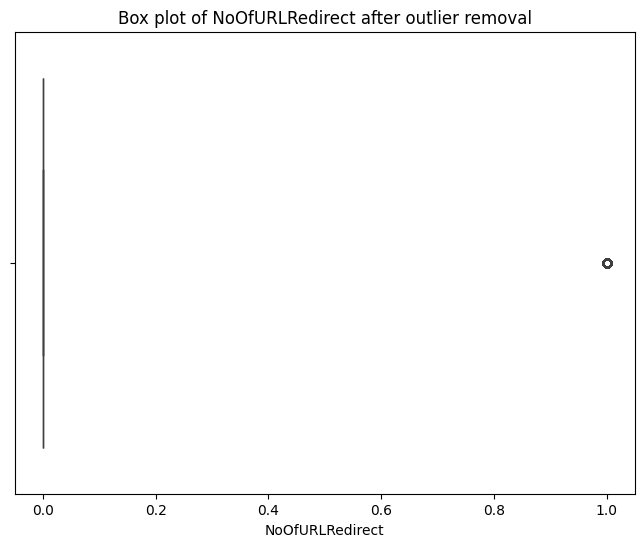

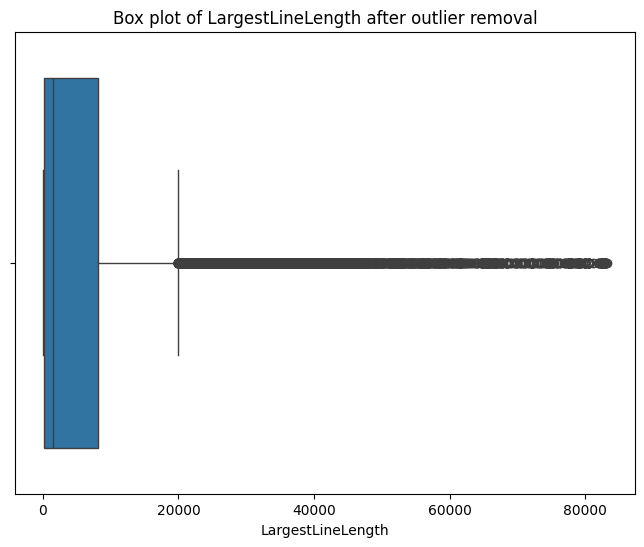

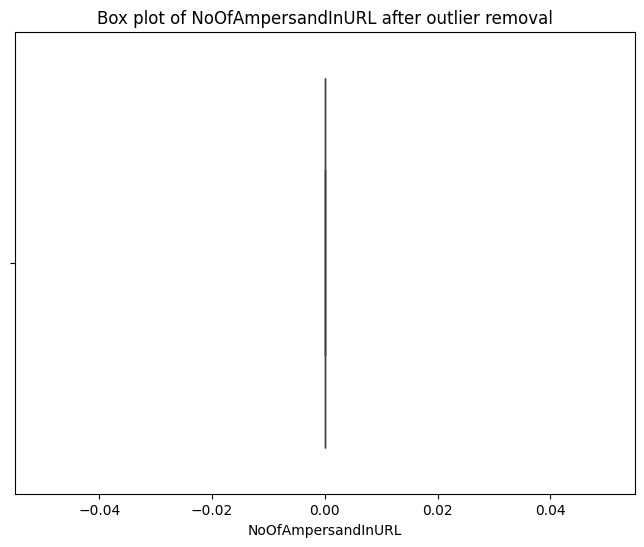

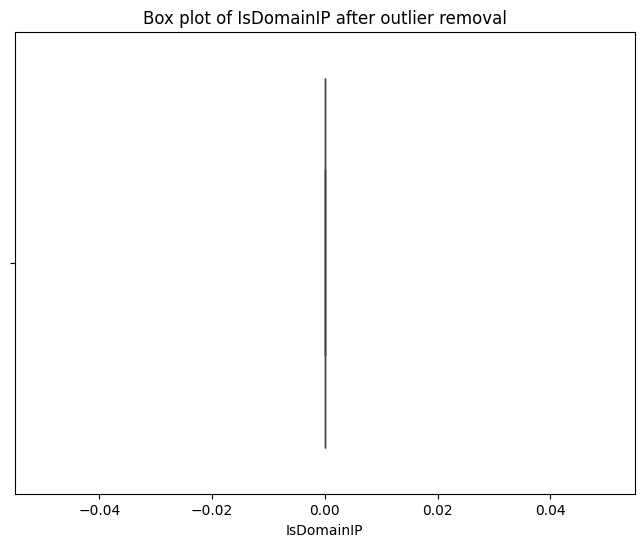

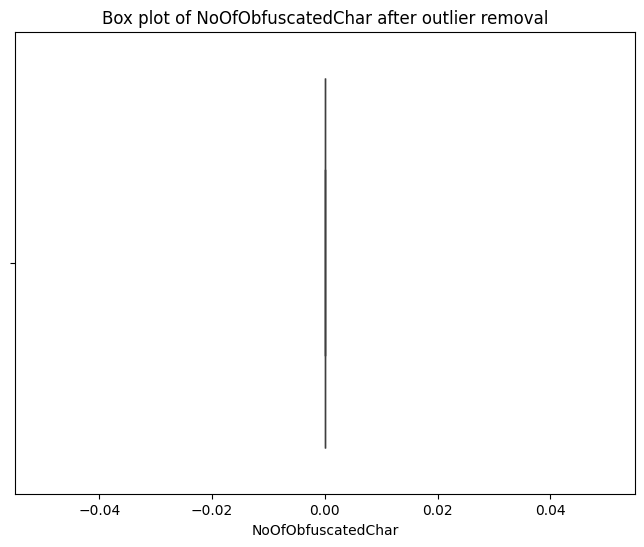

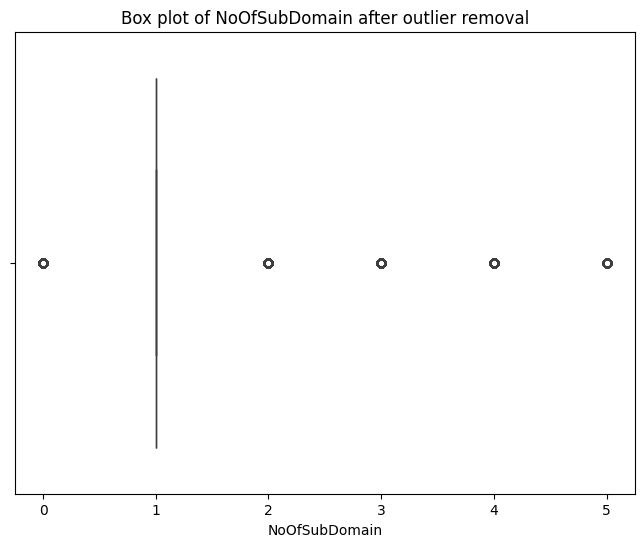

In [219]:
for column in df.columns:
    if column != 'label':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Box plot of {column} after outlier removal')
        plt.show()

In [220]:
df.describe()

,HasTitle,HasHiddenFields,IsResponsive,URLCharProb,HasFavicon,DegitRatioInURL,Robots,LetterRatioInURL,Pay,NoOfJS,...,HasObfuscation,NoOfSelfRedirect,ObfuscationRatio,NoOfURLRedirect,LargestLineLength,NoOfAmpersandInURL,IsDomainIP,NoOfObfuscatedChar,NoOfSubDomain,label
count,122401.000000,122401.000000,122401.000000,122401.000000,122401.000000,122401.000000,122401.000000,122401.000000,122401.000000,122401.000000,...,122401.0,122401.0,122401.0,122401.000000,122401.000000,122401.0,122401.0,122401.0,122401.000000,122401.000000
mean,0.853506,0.376247,0.663271,0.058330,0.358935,0.020432,0.263928,0.524344,0.249892,10.473493,...,0.0,0.0,0.0,0.097189,5116.802257,0.0,0.0,0.0,1.027908,0.604292
std,0.353602,0.484445,0.472593,0.008903,0.479690,0.054053,0.440762,0.107454,0.432952,13.764573,...,0.0,0.0,0.0,0.296216,8642.468105,0.0,0.0,0.0,0.418980,0.489004
min,0.000000,0.000000,0.000000,0.011274,0.000000,0.000000,0.000000,0.077000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,23.000000,0.0,0.0,0.0,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.054347,0.000000,0.000000,0.000000,0.458000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,216.000000,0.0,0.0,0.0,1.000000,0.000000
50%,1.000000,0.000000,1.000000,0.059848,0.000000,0.000000,0.000000,0.520000,0.000000,6.000000,...,0.0,0.0,0.0,0.000000,1440.000000,0.0,0.0,0.0,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.064180,1.000000,0.000000,1.000000,0.594000,0.000000,16.000000,...,0.0,0.0,0.0,0.000000,8125.000000,0.0,0.0,0.0,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.090681,1.000000,0.583000,1.000000,0.890000,1.000000,160.000000,...,0.0,0.0,0.0,1.000000,83156.000000,0.0,0.0,0.0,5.000000,1.000000


In [221]:
print(df['label'].value_counts())

label
1    73966
0    48435
Name: count, dtype: int64


## Train-test Splitting

In [222]:
# Separate features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train-test split performed.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Train-test split performed.
Shape of X_train: (97920, 41)
Shape of X_test: (24481, 41)
Shape of y_train: (97920,)
Shape of y_test: (24481,)


In [223]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN classifier
k_neighbors_param = 7 # You can experiment with different values
knn_model = KNeighborsClassifier(n_neighbors=k_neighbors_param, weights='distance')
knn_model.fit(X_train, y_train)

print("KNN Classifier trained successfully.")

KNN Classifier trained successfully.


In [224]:
# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

print("Predictions made on the test set.")

Predictions made on the test set.


In [225]:
# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print(f"Accuracy of KNN Classifier: {accuracy_knn}")
print("Classification Report of KNN Classifier:")
print(report_knn)

Accuracy of KNN Classifier: 0.9933009272497039
Classification Report of KNN Classifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9687
           1       0.99      1.00      0.99     14794

    accuracy                           0.99     24481
   macro avg       0.99      0.99      0.99     24481
weighted avg       0.99      0.99      0.99     24481



## Fit and test with DT classifier

In [226]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree classifier
dt_model = DecisionTreeClassifier(max_depth=8, min_samples_split=20, min_samples_leaf=10, random_state=42) # Added hyperparameters to mitigate overfitting
dt_model.fit(X_train, y_train)

print("Decision Tree Classifier trained successfully.")

Decision Tree Classifier trained successfully.


In [227]:
# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

print("Predictions made on the test set.")

Predictions made on the test set.


In [228]:
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print(f"Accuracy of Decision Tree Classifier: {accuracy_dt}")
print("Classification Report of Decision Tree Classifier:")
print(report_dt)

Accuracy of Decision Tree Classifier: 0.9959560475470773
Classification Report of Decision Tree Classifier:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9687
           1       1.00      1.00      1.00     14794

    accuracy                           1.00     24481
   macro avg       1.00      1.00      1.00     24481
weighted avg       1.00      1.00      1.00     24481

